<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">Sistem Rekomendasi Produk Pada Toko Alat Tulis dan Peralatan Kantor [Preprocessing]</p>

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">

**🛒Goal:**
    
Setiap bulan atau tahun, retailer dapat mengunggah data penjualan produk dalam format CSV, yang mencakup informasi penjualan harian. Aplikasi ini akan secara otomatis memperbarui database dengan data terbaru, memungkinkan sistem untuk terus belajar dan beradaptasi dengan pola pembelian pelanggan. Dengan cara ini, rekomendasi produk selalu segar dan sesuai dengan tren terbaru di bidang alat tulis dan peralatan kantor.

Menggunakan teknik Market Basket Analysis, aplikasi kami menganalisis data penjualan untuk menemukan asosiasi produk yang sering dibeli bersama. Algoritma seperti Apriori atau FP-Growth akan membantu mengidentifikasi 10 produk teratas yang paling relevan untuk ditampilkan pada banner di depan toko, baik itu produk seperti pulpen, kertas, map, printer, atau perlengkapan kantor lainnya. Ini tidak hanya meningkatkan visibilitas produk, tetapi juga mendorong penjualan dengan strategi pemasaran yang lebih cerdas.

<div style="background-color:#91f2eb; padding:30px; font-size:14px; border-radius: 5px 5px;">
    
**📃 Data:**

| No  | Column     | Deskripsi Singkat                                                                  |
|-----|------------|------------------------------------------------------------------------------------|
| 1   | branch     | Nama atau kode cabang toko tempat transaksi terjadi.                               |
| 2   | divisi     | Divisi dalam toko yang bertanggung jawab atas produk (misalnya, alat tulis, furnitur, dll.). |
| 3   | transaksi  | Kode unik yang merepresentasikan transaksi tertentu.                               |
| 4   | tanggal    | Tanggal transaksi dilakukan.                                                       |
| 5   | customer   | Identitas atau kode unik pelanggan yang melakukan transaksi.                       |
| 6   | cs         | Customer service yang melayani transaksi tersebut.                                 |
| 7   | produk     | Nama produk yang dibeli oleh pelanggan.                                            |
| 8   | quantity   | Jumlah produk yang dibeli dalam transaksi.                                         |
| 9   | satuan     | Satuan produk yang dijual (misalnya, pcs, box, dll.).                              |
| 10  | omset      | Total pendapatan dari transaksi tersebut, dalam satuan mata uang (misalnya, Rupiah).|
| 11  | kategori   | Kategori produk berdasarkan karakteristik yang serupa
    
    
 **Divisi**:
1. **JLD**: Divisi **Jilid**. Berfokus pada produk yang terkait dengan proses penjilidan seperti mesin jilid, kertas jilid, dan aksesori penjilidan lainnya.

2. **ATK**: Divisi **Alat Tulis Kantor**. Menyediakan berbagai perlengkapan kantor seperti pulpen, pensil, penghapus, buku catatan, stapler, dan perlengkapan kantor lainnya.

3. **CTK**: Divisi **Cetak**. Menyediakan layanan dan produk terkait pencetakan seperti printer, tinta, kertas cetak, dan layanan percetakan dokumen.

4. **PC**: Divisi **Personal Computer (PC)**. Menjual perangkat keras komputer, aksesoris, dan komponen terkait seperti komputer desktop, mouse, keyboard, dan monitor.

5. **Pinjaman Sementara**: Divisi ini mungkin menyediakan layanan pinjaman peralatan sementara kepada pelanggan, misalnya, pinjaman alat kantor seperti proyektor atau mesin fotokopi untuk penggunaan jangka pendek.

6. **OE**: Divisi **Office Equipment (Peralatan Kantor)**. Berfokus pada penjualan peralatan besar untuk kantor seperti mesin fotokopi, mesin fax, scanner, dan perangkat elektronik lainnya.

7. **LCD**: Divisi **LCD**. Menjual layar dan perangkat tampilan seperti monitor LCD atau proyektor yang digunakan dalam presentasi atau kebutuhan kantor lainnya.

In [1]:
!pip install pyforest
!pip install pyECLAT
!pip install squarify

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=1cd83870b200078c6351712b7f00c6797fe2a396cb9ebd5b141bd6d6d20dba68
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import time
import math
import itertools
import plotly.graph_objs as go
import plotly.express    as px
import matplotlib.colors as mcolors

In [4]:
from   pyforest          import *
from   tqdm              import tqdm
from   plotly.offline    import iplot
from   scipy             import stats
from   termcolor         import colored
from   sklearn           import metrics
from   plotly.subplots   import make_subplots
from   sklearn.metrics   import accuracy_score
from   datetime          import date, timedelta
from   sklearn.metrics   import silhouette_score, calinski_harabasz_score

from   pyECLAT                    import ECLAT
from   mlxtend.preprocessing      import TransactionEncoder
from   mlxtend.frequent_patterns  import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

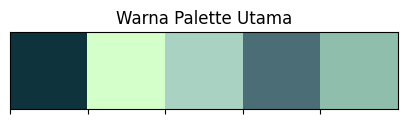

In [5]:
# kumpulan warna palet
colors     = ["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"]
my_palette = sns.color_palette(["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"])
cmap       = mcolors.ListedColormap(colors)

sns.palplot(sns.color_palette(colors))
plt.title('Warna Palette Utama')
plt.show()

<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">2. Data Preprocessing</p>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/transaksi_2021-2023.csv')
data2 = pd.read_csv('/content/drive/MyDrive/SicK/Modeling/data_untuk_model/cart_produk_2021-2023.csv')

df5 = pd.DataFrame(data)
df_bersih_2 = pd.DataFrame(data2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



transaksi              tanggal            branch     divisi  \
0       0262948JL0121  2021-01-04 09:37:15  Digital Printing  Layar LCD   
1       0262949JL0121  2021-01-04 09:35:40  Digital Printing  Layar LCD   
2       0262950JL0121  2021-01-04 09:36:26  Digital Printing  Layar LCD   
3       0262951JL0121  2021-01-04 09:41:50  Digital Printing  Layar LCD   
4       0262952JL0121  2021-01-04 09:40:55  Digital Printing  Layar LCD   
...               ...                  ...               ...        ...   
177081  399052-JL1223  2023-12-06 18:08:56  Digital Printing  Layar LCD   
177082  399053-JL1223  2023-12-06 18:20:24  Digital Printing  Layar LCD   
177083  399054-JL1223  2023-12-06 18:30:04  Digital Printing  Layar LCD   
177084  399056-JL1223  2023-12-06 18:23:59  Digital Printing  Layar LCD   
177085  399057-JL1223  2023-12-06 18:49:12  Digital Printing  Layar LCD   

       customer      cs                                             produk  \
0        Normal    NITA                        NAMEPIN HITAM STANDAR BAHAN   
1        Normal   RENDY                   LASER COLOR PRINT STIKER 25+ (C)   
2        Normal     NUR                                         CETAK BUKU   
3        Normal  SORAYA  DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...   
4        Normal     NUR  LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...   
...         ...     ...                                                ...   
177081   Normal   LIDYA       LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)   
177082   Member   NURUL  LASER CLR P 260/B/J/L/BC 1+ (C ), LASER BW PRI...   
177083   Normal   NURUL                STICKER LABEL/KEMASAN VINYL MIN 4X4   
177084   Normal   LIDYA                  LASER COLOR PRINT ALL 1+ (SM/C/F)   
177085   Normal   KAREN  LASER COLOR PRINT ALL 1+ (SM/C/F), JILID LEM A...   

        quantity      omset satuan               kategori  Tahun  Bulan  \
0            1.0    27500.0   buah    Perlengkapan Kantor   2021      1   
1           30.0   180000.0    lbr  Percetakan dan Kertas   2021      1   
2            2.0   210000.0   buku  Percetakan dan Kertas   2021      1   
3           11.0   115000.0    lbr  Percetakan dan Kertas   2021      1   
4          144.0   450000.0    lbr  Percetakan dan Kertas   2021      1   
...          ...        ...    ...                    ...    ...    ...   
177081       5.0    50000.0    lbr  Percetakan dan Kertas   2023     12   
177082       3.0    20500.0    lbr  Percetakan dan Kertas   2023     12   
177083       2.0    26000.0    lbr              Lain-lain   2023     12   
177084       1.0    15000.0    lbr  Percetakan dan Kertas   2023     12   
177085      73.0  1174500.0    lbr  Percetakan dan Kertas   2023     12   

           Month  Tanggal  Jam  Menit  Detik  
0        January        4    9     37     15  
1        January        4    9     35     40  
2        January        4    9     36     26  
3        January        4    9     41     50  
4        January        4    9     40     55  
...          ...      ...  ...    ...    ...  
177081  December        6   18      8     56  
177082  December        6   18     20     24  
177083  December        6   18     30      4  
177084  December        6   18     23     59  
177085  December        6   18     49     12  

[177086 rows x 18 columns]

In [9]:
df_bersih_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0  \
0               NAMEPIN HITAM STANDAR BAHAN   
1          LASER COLOR PRINT STIKER 25+ (C)   
2                                CETAK BUKU   
3              DESIGN/SETING MASTER LEVEL D   
4       LASER COLOR PRINT 70-120 gr 25+ (C)   
...                                     ...   
177081           PILOT PULPEN 0.7 G-2 HITAM   
177082               FABER-CASTEL PENSIL 2B   
177083                BAZIC PAKU TINDIS 100   
177084                     KINGCO STEROFOAM   
177085                         JILID LAKBAN   

                                          1                                 2  \
0                                       NaN                               NaN   
1                                       NaN                               NaN   
2                                       NaN                               NaN   
3          LASER COLOR PRINT STIKER 10+ (C)                               NaN   
4                            JEPIT KALENDER                               NaN   
...                                     ...                               ...   
177081                                  NaN                               NaN   
177082            DEBOZZ PENGHAPUS 526 B-40                        SDI RAUTAN   
177083  KAPAL LAYAR CREPE SMALL MERAH PUTIH  SAKURA PITA KAIN MERAH PUTIH 1CM   
177084                                  NaN                               NaN   
177085                                  NaN                               NaN   

          3    4    5    6    7    8    9  ...   39   40   41   42   43   44  \
0       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
1       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
2       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
3       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
177081  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
177082  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
177083  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
177084  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
177085  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   

         45   46   47   48  
0       NaN  NaN  NaN  NaN  
1       NaN  NaN  NaN  NaN  
2       NaN  NaN  NaN  NaN  
3       NaN  NaN  NaN  NaN  
4       NaN  NaN  NaN  NaN  
...     ...  ...  ...  ...  
177081  NaN  NaN  NaN  NaN  
177082  NaN  NaN  NaN  NaN  
177083  NaN  NaN  NaN  NaN  
177084  NaN  NaN  NaN  NaN  
177085  NaN  NaN  NaN  NaN  

[177086 rows x 49 columns]

In [10]:
df5_2021_Jan = df5[(df5['Tahun'] == 2021) & (df5['Month'] == 'January')]
mask_2021_Jan = (df5['Tahun'] == 2021) & (df5['Month'] == 'January')

df_bersih_2_2021_Jan = df_bersih_2.loc[mask_2021_Jan]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [11]:
df5_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



transaksi              tanggal            branch  \
0          0262948JL0121  2021-01-04 09:37:15  Digital Printing   
1          0262949JL0121  2021-01-04 09:35:40  Digital Printing   
2          0262950JL0121  2021-01-04 09:36:26  Digital Printing   
3          0262951JL0121  2021-01-04 09:41:50  Digital Printing   
4          0262952JL0121  2021-01-04 09:40:55  Digital Printing   
...                  ...                  ...               ...   
5877  129271/JL/UTM/0121  2021-01-30 14:51:07             Utama   
5878  129272/JL/UTM/0121  2021-01-30 15:01:17             Utama   
5879  129273/JL/UTM/0121  2021-01-30 15:30:13             Utama   
5880  129274/JL/UTM/0121  2021-01-30 16:02:01             Utama   
5881  129275/JL/UTM/0121  2021-01-30 16:08:47             Utama   

                 divisi customer      cs  \
0             Layar LCD   Normal    NITA   
1             Layar LCD   Normal   RENDY   
2             Layar LCD   Normal     NUR   
3             Layar LCD   Normal  SORAYA   
4             Layar LCD   Normal     NUR   
...                 ...      ...     ...   
5877  Alat Tulis Kantor   Normal   MELSI   
5878  Alat Tulis Kantor   Normal   MELSI   
5879  Alat Tulis Kantor   Normal   MELSI   
5880  Alat Tulis Kantor   Normal   MELSI   
5881  Alat Tulis Kantor   Member   NILAM   

                                                 produk  quantity      omset  \
0                           NAMEPIN HITAM STANDAR BAHAN       1.0    27500.0   
1                      LASER COLOR PRINT STIKER 25+ (C)      30.0   180000.0   
2                                            CETAK BUKU       2.0   210000.0   
3     DESIGN/SETING MASTER LEVEL D, LASER COLOR PRIN...      11.0   115000.0   
4     LASER COLOR PRINT 70-120 gr 25+ (C), JEPIT KAL...     144.0   450000.0   
...                                                 ...       ...        ...   
5877                                          CETAK MUG      50.0  1575000.0   
5878                      BANNER, BANNER, CETAK SPANDUK       7.0  1530000.0   
5879                             CETAK YASIN HARD COVER      12.0   420000.0   
5880                                       BIAYA SABLON       1.0   451000.0   
5881                                      PEMBELIAN ATK       1.0   325000.0   

     satuan               kategori  Tahun  Bulan    Month  Tanggal  Jam  \
0      buah    Perlengkapan Kantor   2021      1  January        4    9   
1       lbr  Percetakan dan Kertas   2021      1  January        4    9   
2      buku  Percetakan dan Kertas   2021      1  January        4    9   
3       lbr  Percetakan dan Kertas   2021      1  January        4    9   
4       lbr  Percetakan dan Kertas   2021      1  January        4    9   
...     ...                    ...    ...    ...      ...      ...  ...   
5877     bh  Percetakan dan Kertas   2021      1  January       30   14   
5878    lbr  Percetakan dan Kertas   2021      1  January       30   15   
5879   buku  Percetakan dan Kertas   2021      1  January       30   15   
5880    lbr  Percetakan dan Kertas   2021      1  January       30   16   
5881    pcs    Perlengkapan Kantor   2021      1  January       30   16   

      Menit  Detik  
0        37     15  
1        35     40  
2        36     26  
3        41     50  
4        40     55  
...     ...    ...  
5877     51      7  
5878      1     17  
5879     30     13  
5880      2      1  
5881      8     47  

[4050 rows x 18 columns]

In [12]:
df_bersih_2_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                                 1  \
0             NAMEPIN HITAM STANDAR BAHAN                               NaN   
1        LASER COLOR PRINT STIKER 25+ (C)                               NaN   
2                              CETAK BUKU                               NaN   
3            DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4     LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   
...                                   ...                               ...   
5877                        PEMBELIAN ATK                               NaN   
5878                        PEMBELIAN ATK                               NaN   
5879                        PEMBELIAN ATK                               NaN   
5880                        PEMBELIAN ATK                               NaN   
5881                        PEMBELIAN ATK                               NaN   

        2    3    4    5    6    7    8    9  ...   39   40   41   42   43  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5877  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
5878  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
5879  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
5880  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
5881  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   

       44   45   46   47   48  
0     NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  
5877  NaN  NaN  NaN  NaN  NaN  
5878  NaN  NaN  NaN  NaN  NaN  
5879  NaN  NaN  NaN  NaN  NaN  
5880  NaN  NaN  NaN  NaN  NaN  
5881  NaN  NaN  NaN  NaN  NaN  

[4050 rows x 49 columns]

In [13]:
df_bersih_2021_Jan = df_bersih_2_2021_Jan.reset_index(drop=True)
df_2021_Jan = df5_2021_Jan.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [14]:
df_2021_Jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   transaksi  4050 non-null   object 
 1   tanggal    4050 non-null   object 
 2   branch     4050 non-null   object 
 3   divisi     4050 non-null   object 
 4   customer   4050 non-null   object 
 5   cs         4050 non-null   object 
 6   produk     4050 non-null   object 
 7   quantity   4050 non-null   float64
 8   omset      4050 non-null   float64
 9   satuan     4050 non-null   object 
 10  kategori   4050 non-null   object 
 11  Tahun      4050 non-null   int64  
 12  Bulan      4050 non-null   int64  
 13  Month      4050 non-null   object 
 14  Tanggal    4050 non-null   int64  
 15  Jam        4050 non-null   int64  
 16  Menit      4050 non-null   int64  
 17  Detik      4050 non-null   int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 569.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [15]:
df_bersih_2021_Jan = df_bersih_2021_Jan.fillna(value= float('nan'))
df_bersih_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                                 1  \
0             NAMEPIN HITAM STANDAR BAHAN                               NaN   
1        LASER COLOR PRINT STIKER 25+ (C)                               NaN   
2                              CETAK BUKU                               NaN   
3            DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4     LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   
...                                   ...                               ...   
4045                        PEMBELIAN ATK                               NaN   
4046                        PEMBELIAN ATK                               NaN   
4047                        PEMBELIAN ATK                               NaN   
4048                        PEMBELIAN ATK                               NaN   
4049                        PEMBELIAN ATK                               NaN   

        2    3    4    5    6    7    8    9  ...  39  40  41  42  43  44  45  \
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..   
4045  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4046  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4047  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4048  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4049  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... NaN NaN NaN NaN NaN NaN NaN   

      46  47  48  
0    NaN NaN NaN  
1    NaN NaN NaN  
2    NaN NaN NaN  
3    NaN NaN NaN  
4    NaN NaN NaN  
...   ..  ..  ..  
4045 NaN NaN NaN  
4046 NaN NaN NaN  
4047 NaN NaN NaN  
4048 NaN NaN NaN  
4049 NaN NaN NaN  

[4050 rows x 49 columns]

In [16]:
items_total_21_Jan = df_bersih_2021_Jan.apply(pd.Series.value_counts).sum(axis=1)
items_total_21_Jan = pd.DataFrame({'items': items_total_21_Jan.index,
                            'transactions': items_total_21_Jan.values})

items_total_21_Jan.sort_values('transactions',
                         ascending=False).head(20).reset_index(drop=True).style.background_gradient(cmap='ocean_r')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

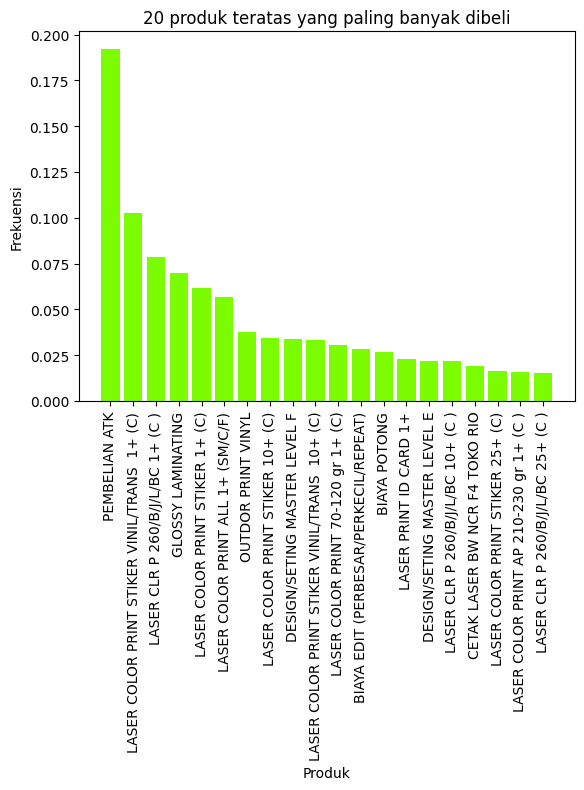

In [17]:
jumlah_produk    = df_bersih_2021_Jan.apply(pd.Series.value_counts)
total_sampel     = len(df_2021_Jan)
frekuensi_produk = jumlah_produk / total_sampel
produk_top       = frekuensi_produk.sum(axis=1).sort_values(ascending=False).head(20)

plt.bar(produk_top.index, produk_top.values, color='#7CFC00')
plt.xlabel('Produk')
plt.ylabel('Frekuensi')
plt.title('20 produk teratas yang paling banyak dibeli')
plt.xticks(rotation=90)
plt.show()

In [18]:
items_total_21_Jan['semua'] = "Tree Map"
items_total_21_Jan          = items_total_21_Jan.sort_values('transactions', ascending=False)

fig = px.treemap(items_total_21_Jan.head(20),
                 path=['semua', "items"],
                 values='transactions',
                 color=items_total_21_Jan["transactions"].head(20),
                 hover_data=['items'],
                 title="Peta Pohon berisi 20 produk teratas yang paling banyak muncul di keranjang belanja",
                 color_continuous_scale='Greens')

# Perbesar font label
fig.update_traces(textinfo="label+value", textfont_size=18)  # Ubah nilai textfont_size sesuai keinginan Anda

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

### Melakukan analisis frekuensi atau transaksi belanjaan
Melihat berapa produk yang dibeli dalam satu kali proses belanja

In [19]:
produk_per_transaksi = df_bersih_2021_Jan.count(axis=1)
produk_per_transaksi = produk_per_transaksi.value_counts()
produk_per_transaksi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1     2806
2      912
3      240
4       66
5       10
6        7
8        3
9        2
11       2
7        2
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah produk yang dibeli dalam satu kali proses belanja')

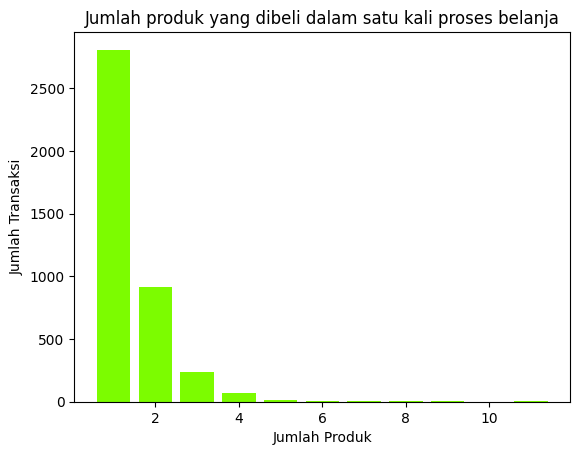

In [20]:
plt.bar(produk_per_transaksi.index, produk_per_transaksi.values, color='#7CFC00')
plt.xlabel('Jumlah Produk')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah produk yang dibeli dalam satu kali proses belanja')

Dalam satu kali transaksi, para pelanggan seringkali membeli 1 sampai 3 jenis produk yang berbeda

#### Outlier handling
Menghapus suatu transaksi yang membeli lebih dari 10 produk secara bersamaan

In [21]:
df_lihat = df_bersih_2021_Jan.loc[df_bersih_2021_Jan.count(axis=1) >= 10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [22]:
df_lihat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                     1  \
880   AICE MILK MELON 50GR  AICE SWEET CORN 52GR   
1755  AICE MILK MELON 50GR  AICE SWEET CORN 52GR   

                                  2                                  3  \
880   AICE CHOCO COOKIES STICK 60GR  AICE SUNDAE AVOCADO CHOCOLATE CUP   
1755  AICE FRUIT TWISTER STICK 60ML      AICE CHOCO COOKIES STICK 60GR   

                                4                              5  \
880   AICE SUNDAE CHOCO CUP 100ML          AICE MOCHI CHOCO 45ML   
1755   AICE CHOCOLATE CRISPY 60GR  AICE COFFEE CRISPY STICK 45GR   

                                6                      7  \
880       AICE MOCHI VANILLA 30GR   AICE CONE CHOCO MELT   
1755  AICE SUNDAE CHOCO CUP 100ML  AICE MOCHI CHOCO 45ML   

                               8                                  9  ...  39  \
880   AICE BLUBERRY YOGHURT 65ML                    AICE SUSU TELUR  ... NaN   
1755     AICE MOCHI VANILLA 30GR  AICE SUNDAE AVOCADO CHOCOLATE CUP  ... NaN   

      40  41  42  43  44  45  46  47  48  
880  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1755 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 49 columns]

In [23]:
df_2021_Jan.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4050, 18)

In [24]:
df_bersih_2021_Jan.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4050, 49)

In [25]:
df_lihat_index = df_bersih_2021_Jan.loc[df_bersih_2021_Jan.count(axis=1) >= 10].index
df_2021_Jan_filtered = df_2021_Jan.loc[df_lihat_index]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [26]:
df_lihat_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index([880, 1755], dtype='int64')

In [27]:
df_2021_Jan_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



transaksi              tanggal            branch     divisi  \
880   0263867JL0121  2021-01-11 11:07:47  Digital Printing  Layar LCD   
1755  0264785JL0121  2021-01-18 16:30:22  Digital Printing  Layar LCD   

     customer     cs                             produk  quantity    omset  \
880    Normal  NICIA   LASER CLR P 260/B/J/L/BC 1+ (C )       1.0   6000.0   
1755   Normal   NITA  LASER PRINT ID CARD + SET. MASTER       1.0  25000.0   

     satuan               kategori  Tahun  Bulan    Month  Tanggal  Jam  \
880     lbr       Peralatan Kantor   2021      1  January       11   11   
1755   buah  Percetakan dan Kertas   2021      1  January       18   16   

      Menit  Detik  
880       7     47  
1755     30     22

In [28]:
df_bersih_2021_Jan = df_bersih_2021_Jan.drop(df_lihat_index)
df_2021_Jan = df_2021_Jan.drop(df_lihat_index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [29]:
df_bersih_2021_Jan.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4048, 49)

In [30]:
empty_cols = [col for col in df_bersih_2021_Jan.columns if not df_bersih_2021_Jan[col].notna().any()]

empty_cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48']

In [31]:
mask = df_bersih_2021_Jan[empty_cols].notna().any(axis=1)
df_bersih_2021_Jan = df_bersih_2021_Jan[~mask]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [32]:
# Drop the empty columns
df_bersih_2021_Jan = df_bersih_2021_Jan.drop(empty_cols, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [33]:
df_bersih_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                                 1  \
0             NAMEPIN HITAM STANDAR BAHAN                               NaN   
1        LASER COLOR PRINT STIKER 25+ (C)                               NaN   
2                              CETAK BUKU                               NaN   
3            DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4     LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   
...                                   ...                               ...   
4045                        PEMBELIAN ATK                               NaN   
4046                        PEMBELIAN ATK                               NaN   
4047                        PEMBELIAN ATK                               NaN   
4048                        PEMBELIAN ATK                               NaN   
4049                        PEMBELIAN ATK                               NaN   

        2    3    4    5    6    7    8  
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  
4045  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4046  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4047  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4048  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4049  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4048 rows x 9 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">3. Modeling</p>

### Market Basket Analisis
Mencoba 3 algoritma berbeda:
- ECLAT (Equivalence Class Clustering and bottom-up Lattice Traversal)
- Apriori
- FP-Growth (Frequent Pattern Growth)


#### SImple explanation
**Market basket analysis** adalah teknik yang digunakan dalam bisnis ritel dan e-commerce untuk dan mengidentifikasi hubungan antara produk yang sering dibeli bersamaan.

Dengan mengidentifikasi produk yang sering dibeli bersamaan, bisnis dapat mengoptimalkan penempatan produk, membuat promosi yang ditargetkan, dan meningkatkan pengalaman pelanggan.


**Associate Rule Mining** adalah teknik yang digunakan untuk mencari asosiasi antara satu item dengan item lainnya.

![image.png]()

- Support (s): Mengukur seberapa sering suatu item atau kombinasi item muncul dalam dataset.
- Confidence (c): Mengukur seberapa sering item B muncul dalam transaksi yang mengandung item A.
- Lift (l): Mengukur seberapa banyak item B lebih mungkin dibeli ketika item A dibeli, dibandingkan dengan item B dibeli sendiri.

![image-2.png](attachment:image-2.png)

#### Insight
- Gunakan support yang lebih tinggi untuk mengidentifikasi set item yang umum dibeli.
- Gunakan confidence yang lebih tinggi untuk mengidentifikasi hubungan bersyarat yang kuat antar item.
- Gunakan lift yang lebih tinggi untuk mengidentifikasi itemset di mana pembelian bersama lebih sering terjadi daripada yang diharapkan secara kebetulan.

Semakin besar nilai support maka akan semakin besar menghitung hubungan-hubungan yang jarang dilakukan. (semakin buruk)


In [34]:
# nilai support dan confident

min_supp = eval(input("Masukkan nilai support (s): "))
min_conf = eval(input("Masukkan nilai confidence (c): "))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Masukkan nilai support (s): 0.001
Masukkan nilai confidence (c): 0.01


#### Apriori

In [35]:
df_bersih_2021_Jan = df_bersih_2021_Jan.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
df_bersih_2021_Jan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                                 1  \
0             NAMEPIN HITAM STANDAR BAHAN                               NaN   
1        LASER COLOR PRINT STIKER 25+ (C)                               NaN   
2                              CETAK BUKU                               NaN   
3            DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4     LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   
...                                   ...                               ...   
4043                        PEMBELIAN ATK                               NaN   
4044                        PEMBELIAN ATK                               NaN   
4045                        PEMBELIAN ATK                               NaN   
4046                        PEMBELIAN ATK                               NaN   
4047                        PEMBELIAN ATK                               NaN   

        2    3    4    5    6    7    8  
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  
4043  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4044  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4045  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4046  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4047  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4048 rows x 9 columns]

In [37]:
df_bersih_2021_Jan[df_bersih_2021_Jan.iloc[:, 5].notna()].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0  \
200   LASER CLR P 260/B/J/L/BC 1+ (C/F)   
218           AICE CHOCOLATE STICK 40GR   
452                AICE SWEET CORN 52GR   
1265               AICE MILK MELON 50GR   
1629       DESIGN/SETING MASTER LEVEL F   

                                            1                              2  \
200                       LAMINATING BIASA F4   JILID SPIRAL KAWAT A4 UK. 16   
218             AICE CHOCO COOKIES STICK 60GR     AICE CHOCOLATE CRISPY 60GR   
452             AICE CHOCO COOKIES STICK 60GR     AICE CHOCOLATE CRISPY 60GR   
1265                     AICE SWEET CORN 52GR  AICE CHOCO COOKIES STICK 60GR   
1629  LASER COLOR PRINT AP 210-230 gr 1+ (C )            PEKERJAAN FINISHING   

                                        3  \
200          DESIGN/SETING MASTER LEVEL D   
218               AICE MOCHI VANILLA 30GR   
452         AICE FRUIT TWISTER STICK 60ML   
1265           AICE CHOCOLATE CRISPY 60GR   
1629  KARTU NAMA UK.STD (54x90) 2 MUKA 1+   

                                        4                                  5  \
200   ROLL BANNER VINIL CETAK TANPA STAND       DESIGN/SETING MASTER LEVEL E   
218                       AICE SUSU TELUR         AICE BLUBERRY YOGHURT 65ML   
452         AICE COFFEE CRISPY STICK 45GR                    AICE SUSU TELUR   
1265          AICE SUNDAE CHOCO CUP 100ML               AICE CONE CHOCO MELT   
1629            DESIGN KARTU NAMA STANDAR  LASER COLOR PRINT STIKER 1+ (C/F)   

                                      6                                  7  \
200                                 NaN                                NaN   
218               AICE MOCHI CHOCO 45ML      AICE FRUIT TWISTER STICK 60ML   
452         AICE SUNDAE CHOCO CUP 100ML               AICE CONE CHOCO MELT   
1265         AICE BLUBERRY YOGHURT 65ML  AICE SUNDAE AVOCADO CHOCOLATE CUP   
1629  LASER CLR P 260/B/J/L/BC 25+ (C )                   MATA AYAM LUBANG   

                               8  
200                          NaN  
218                          NaN  
452   AICE BLUBERRY YOGHURT 65ML  
1265             AICE SUSU TELUR  
1629                         NaN

In [38]:
df6 = df_bersih_2021_Jan.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
print(df6.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
df6.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4048, 9)

In [41]:
df6.columns = [str(i) for i in range(9)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
print(df6.isna().sum())

0       0
1    2806
2    3718
3    3958
4    4024
5    4034
6    4041
7    4043
8    4046
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
df6 = df6.replace(np.nan, None)
df6.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

0                                 1  \
0          NAMEPIN HITAM STANDAR BAHAN                              None   
1     LASER COLOR PRINT STIKER 25+ (C)                              None   
2                           CETAK BUKU                              None   
3         DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4  LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   

      2     3     4     5     6     7     8  
0  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None

mencoba menggunakan teknik encoding/binari baru selain one hot sebelumnya, yaitu:

**Transaction Encoder**: Teknik encoding yang cocok digunakan ketika ingin menerapkannya pada algoritma Apriori. TransactionEncoder akan menerjemahkan setiap transaksi (baris data) menjadi vektor biner, di mana setiap kolom vektor mewakili keberadaan atau ketiadaan item tertentu dalam transaksi.

In [44]:
transaksi = []

for _, row in df6.iterrows():
  temp = []

  for column, value in row.items():
    if value is not None:
      i = f"{value}"
      temp.append(i)
    transaksi.append(temp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
transaksi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['NAMEPIN HITAM STANDAR BAHAN'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['CETAK BUKU'],
 ['DESIGN/SETING MASTER LEVEL D', 'LASER COLOR PRINT STIKER 10+ (C)'],
 ['DESIGN/SETING MASTER LEVEL D', 'LASER COLOR PRINT STIKER 10+ (C)'],
 ['DESIGN/SETING MASTER LEVEL D', 'LASER COLOR P

In [46]:
encode_tran = TransactionEncoder()
array_tran = encode_tran.fit(transaksi).transform(transaksi)
df7 = pd.DataFrame(array_tran, columns=encode_tran.columns_)
df7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

AICE BLUBERRY YOGHURT 65ML  AICE CHOCO COOKIES STICK 60GR  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   
...                           ...                            ...   
36427                       False                          False   
36428                       False                          False   
36429                       False                          False   
36430                       False                          False   
36431                       False                          False   

       AICE CHOCOLATE CRISPY 60GR  AICE CHOCOLATE STICK 40GR  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
36427                       False                      False   
36428                       False                      False   
36429                       False                      False   
36430                       False                      False   
36431                       False                      False   

       AICE COFFEE CRISPY STICK 45GR  AICE CONE CHOCO MELT  \
0                              False                 False   
1                              False                 False   
2                              False                 False   
3                              False                 False   
4                              False                 False   
...                              ...                   ...   
36427                          False                 False   
36428                          False                 False   
36429                          False                 False   
36430                          False                 False   
36431                          False                 False   

       AICE FRUIT TWISTER STICK 60ML  AICE MILK MELON 50GR  \
0                              False                 False   
1                              False                 False   
2                              False                 False   
3                              False                 False   
4                              False                 False   
...                              ...                   ...   
36427                          False                 False   
36428                          False                 False   
36429                          False                 False   
36430                          False                 False   
36431                          False                 False   

       AICE MOCHI CHOCO 45ML  AICE MOCHI VANILLA 30GR  ...  \
0                      False                    False  ...   
1                      False                    False  ...   
2                      False                    False  ...   
3                      False                    False  ...   
4                      False                    False  ...   
...                      ...                      ...  ...   
36427                  False                    False  ...   
36428                  False                    False  ...   
36429                  False                    False  ...   
36430                  False                    False  ...   
36431                  False                    False  ...   

       TRODAT STEMPEL PRINTY 3912 + CETAK  TRODAT STEMPEL PRINTY 3913 + CETAK  \
0                                   False                               False   
1                       

In [47]:
df7.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



35587

In [48]:
df7 = df7.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
df7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AICE BLUBERRY YOGHURT 65ML  AICE CHOCO COOKIES STICK 60GR  \
0                           False                          False   
9                           False                          False   
18                          False                          False   
27                          False                          False   
36                          False                          False   
...                           ...                            ...   
34560                       False                          False   
34884                       False                          False   
35082                       False                          False   
35100                       False                          False   
35766                       False                          False   

       AICE CHOCOLATE CRISPY 60GR  AICE CHOCOLATE STICK 40GR  \
0                           False                      False   
9                           False                      False   
18                          False                      False   
27                          False                      False   
36                          False                      False   
...                           ...                        ...   
34560                       False                      False   
34884                       False                      False   
35082                       False                      False   
35100                       False                      False   
35766                       False                      False   

       AICE COFFEE CRISPY STICK 45GR  AICE CONE CHOCO MELT  \
0                              False                 False   
9                              False                 False   
18                             False                 False   
27                             False                 False   
36                             False                 False   
...                              ...                   ...   
34560                          False                 False   
34884                          False                 False   
35082                          False                 False   
35100                          False                 False   
35766                          False                 False   

       AICE FRUIT TWISTER STICK 60ML  AICE MILK MELON 50GR  \
0                              False                 False   
9                              False                 False   
18                             False                 False   
27                             False                 False   
36                             False                 False   
...                              ...                   ...   
34560                          False                 False   
34884                          False                 False   
35082                          False                 False   
35100                          False                 False   
35766                          False                 False   

       AICE MOCHI CHOCO 45ML  AICE MOCHI VANILLA 30GR  ...  \
0                      False                    False  ...   
9                      False                    False  ...   
18                     False                    False  ...   
27                     False                    False  ...   
36                     False                    False  ...   
...                      ...                      ...  ...   
34560                  False                    False  ...   
34884                  False                    False  ...   
35082                  False                    False  ...   
35100                  False                    False  ...   
35766                  False                    False  ...   

       TRODAT STEMPEL PRINTY 3912 + CETAK  TRODAT STEMPEL PRINTY 3913 + CETAK  \
0                                   False                               False   
9                       

In [50]:
df8 = df7.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
hitung = 0

for i in transaksi:
    for j in i:
        if j == 'PEMBELIAN ATK':
            hitung += 1
print(hitung)

df8['PEMBELIAN ATK'].value_counts()

7002


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PEMBELIAN ATK
False    839
True       6
Name: count, dtype: int64

In [52]:
waktu_mulai          = time.time()
apr                  = apriori(df8,
                              min_support=min_supp,
                              use_colnames=True)

apr.itemsets


elapsed_time_apriori = time.time() - waktu_mulai

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
waktu_mulai          = time.time()

rule_APR             = association_rules(apr,
                                         metric='confidence',
                                         min_threshold=min_conf)

rule_APR             = rule_APR[rule_APR.lift > 1]
rule_APR             = rule_APR.reset_index(drop=True)

elapsed_time_apriori = elapsed_time_apriori + time.time() - waktu_mulai
rule_APR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0      (AICE CHOCO COOKIES STICK 60GR)   
1         (AICE BLUBERRY YOGHURT 65ML)   
2         (AICE CHOCOLATE CRISPY 60GR)   
3         (AICE BLUBERRY YOGHURT 65ML)   
4          (AICE CHOCOLATE STICK 40GR)   
...                                ...   
65335    (AICE SUNDAE CHOCO CUP 100ML)   
65336           (AICE CONE CHOCO MELT)   
65337     (AICE CHOCOLATE CRISPY 60GR)   
65338  (AICE CHOCO COOKIES STICK 60GR)   
65339           (AICE SWEET CORN 52GR)   

                                             consequents  antecedent support  \
0                           (AICE BLUBERRY YOGHURT 65ML)            0.003550   
1                        (AICE CHOCO COOKIES STICK 60GR)            0.004734   
2                           (AICE BLUBERRY YOGHURT 65ML)            0.007101   
3                           (AICE CHOCOLATE CRISPY 60GR)            0.004734   
4                           (AICE BLUBERRY YOGHURT 65ML)            0.001183   
...                                                  ...                 ...   
65335  (AICE SUNDAE AVOCADO CHOCOLATE CUP, AICE SUSU ...            0.004734   
65336  (AICE SUNDAE AVOCADO CHOCOLATE CUP, AICE SUSU ...            0.003550   
65337  (AICE SUNDAE AVOCADO CHOCOLATE CUP, AICE SUSU ...            0.007101   
65338  (AICE SUNDAE AVOCADO CHOCOLATE CUP, AICE SUSU ...            0.003550   
65339  (AICE SUNDAE AVOCADO CHOCOLATE CUP, AICE SUSU ...            0.003550   

       consequent support   support  confidence        lift  leverage  \
0                0.004734  0.003550    1.000000  211.250000  0.003533   
1                0.003550  0.003550    0.750000  211.250000  0.003533   
2                0.004734  0.004734    0.666667  140.833333  0.004700   
3                0.007101  0.004734    1.000000  140.833333  0.004700   
4                0.004734  0.001183    1.000000  211.250000  0.001178   
...                   ...       ...         ...         ...       ...   
65335            0.001183  0.001183    0.250000  211.250000  0.001178   
65336            0.001183  0.001183    0.333333  281.666667  0.001179   
65337            0.001183  0.001183    0.166667  140.833333  0.001175   
65338            0.001183  0.001183    0.333333  281.666667  0.001179   
65339            0.001183  0.001183    0.333333  281.666667  0.001179   

       conviction  zhangs_metric  
0             inf       0.998812  
1        3.985799       1.000000  
2        2.985799       1.000000  
3             inf       0.997622  
4             inf       0.996445  
...           ...            ...  
65335    1.331755       1.000000  
65336    1.498225       1.000000  
65337    1.198580       1.000000  
65338    1.498225       1.000000  
65339    1.498225       1.000000  

[65340 rows x 10 columns]

In [54]:
rule_APR.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(65340, 10)

In [55]:
top_products_apr = rule_APR[['antecedents', 'support']].groupby('antecedents').sum().reset_index()
top_products_apr.columns = ['produk', 'support']
top_products_apr['produk'] = top_products_apr['produk'].apply(lambda x: ', '.join(map(str, x)))
top_products_apr = top_products_apr[~top_products_apr['produk'].str.contains('AICE', case=False)]
top_products_apr = top_products_apr.nlargest(15, 'support')

top_products_apr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



produk   support
1817                  DESIGN/SETING MASTER LEVEL F  0.501775
2075  LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.423669
2064              LASER CLR P 260/B/J/L/BC 1+ (C )  0.388166
2109                  DESIGN/SETING MASTER LEVEL D  0.357396
2083                             GLOSSY LAMINATING  0.346746
2105                                  BIAYA POTONG  0.338462
2073               LASER COLOR PRINT STIKER 1+ (C)  0.278107
2078                           PEKERJAAN FINISHING  0.267456
2119                  DESIGN/SETING MASTER LEVEL E  0.228402
1972                              MATA AYAM LUBANG  0.224852
2137             LASER CLR P 260/B/J/L/BC 25+ (C )  0.215385
2068            LASER COLOR PRINT 70-120 gr 1+ (C)  0.211834
2108             LASER COLOR PRINT ALL 1+ (SM/C/F)  0.201183
2062                           LAMINATING BIASA F4  0.197633
1970       LASER COLOR PRINT AP 210-230 gr 1+ (C )  0.196450

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### FP-Growth

In [56]:
df9 = df_bersih_2021_Jan.replace(np.nan, None)
df9.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

0                                 1  \
0          NAMEPIN HITAM STANDAR BAHAN                              None   
1     LASER COLOR PRINT STIKER 25+ (C)                              None   
2                           CETAK BUKU                              None   
3         DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4  LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   

      2     3     4     5     6     7     8  
0  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None

In [57]:
df9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                                 1  \
0             NAMEPIN HITAM STANDAR BAHAN                              None   
1        LASER COLOR PRINT STIKER 25+ (C)                              None   
2                              CETAK BUKU                              None   
3            DESIGN/SETING MASTER LEVEL D  LASER COLOR PRINT STIKER 10+ (C)   
4     LASER COLOR PRINT 70-120 gr 25+ (C)                    JEPIT KALENDER   
...                                   ...                               ...   
4043                        PEMBELIAN ATK                              None   
4044                        PEMBELIAN ATK                              None   
4045                        PEMBELIAN ATK                              None   
4046                        PEMBELIAN ATK                              None   
4047                        PEMBELIAN ATK                              None   

         2     3     4     5     6     7     8  
0     None  None  None  None  None  None  None  
1     None  None  None  None  None  None  None  
2     None  None  None  None  None  None  None  
3     None  None  None  None  None  None  None  
4     None  None  None  None  None  None  None  
...    ...   ...   ...   ...   ...   ...   ...  
4043  None  None  None  None  None  None  None  
4044  None  None  None  None  None  None  None  
4045  None  None  None  None  None  None  None  
4046  None  None  None  None  None  None  None  
4047  None  None  None  None  None  None  None  

[4048 rows x 9 columns]

In [58]:
transaksi2 = []

for _, row in df9.iterrows():
    temp = [item for item in row if item is not None]
    transaksi2.append(temp)

transaksi2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['NAMEPIN HITAM STANDAR BAHAN'],
 ['LASER COLOR PRINT STIKER 25+ (C)'],
 ['CETAK BUKU'],
 ['DESIGN/SETING MASTER LEVEL D', 'LASER COLOR PRINT STIKER 10+ (C)'],
 ['LASER COLOR PRINT 70-120 gr 25+ (C)', 'JEPIT KALENDER'],
 ['LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)'],
 ['BIAYA POTONG',
  'LASER COLOR PRINT STIKER VINIL/TRANS  25+ (C)',
  'PEKERJAAN FINISHING'],
 ['BIAYA CETAK ULANG FAKTUR'],
 ['LASER COLOR PRINT ALL 1+ (SM/C/F)'],
 ['LASER COLOR PRINT ALL 1+ (SM/C/F)'],
 ['CETAK LASER BW NCR F4 TOKO RIO'],
 ['LASER COLOR PRINT STIKER 1+ (C)', 'LASER CLR P 260/B/J/L/BC 1+ (C )'],
 ['LASER COLOR PRINT 70-120 gr 25+ (C)',
  'JILID ALBUM',
  'LASER COLOR PRINT ALL 1+ (SM/C/F)'],
 ['LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)'],
 ['COPY LASER COLOR A4/A3 150-260gr/SLIDE (C )'],
 ['LASER CLR P 260/B/J/L/BC 25+ (C )'],
 ['LASER CLR P 260/B/J/L/BC 10+ (C )'],
 ['LASER COLOR PRINT STIKER 10+ (C)',
  'LASER COLOR PRINT STIKER VINIL/TRANS  10+ (C)'],
 ['LASER COLOR PRINT STIKER 1+ (C)'],
 ['L

In [59]:
len(transaksi2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



4048

In [60]:
encode_tran2  = TransactionEncoder()
array_tran_fp = encode_tran2.fit(transaksi2).transform(transaksi2)

df9 = pd.DataFrame(array_tran_fp, columns=encode_tran2.columns_)
df9.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

AICE BLUBERRY YOGHURT 65ML  AICE CHOCO COOKIES STICK 60GR  \
0                       False                          False   
1                       False                          False   
2                       False                          False   
3                       False                          False   
4                       False                          False   

   AICE CHOCOLATE CRISPY 60GR  AICE CHOCOLATE STICK 40GR  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   AICE COFFEE CRISPY STICK 45GR  AICE CONE CHOCO MELT  \
0                          False                 False   
1                          False                 False   
2                          False                 False   
3                          False                 False   
4                          False                 False   

   AICE FRUIT TWISTER STICK 60ML  AICE MILK MELON 50GR  AICE MOCHI CHOCO 45ML  \
0                          False                 False                  False   
1                          False                 False                  False   
2                          False                 False                  False   
3                          False                 False                  False   
4                          False                 False                  False   

   AICE MOCHI VANILLA 30GR  ...  TRODAT STEMPEL PRINTY 3912 + CETAK  \
0                    False  ...                               False   
1                    False  ...                               False   
2                    False  ...                               False   
3                    False  ...                               False   
4                    False  ...                               False   

   TRODAT STEMPEL PRINTY 3913 + CETAK  TRODAT STEMPEL3445 + CETAK  \
0                               False                       False   
1                               False                       False   
2                               False                       False   
3                               False                       False   
4                               False                       False   

   TUMBLER MUG INSERT  TUMBLER TRAVEL THERMOS  500ML CETAK UV  UNDANGAN  \
0               False                                   False     False   
1               False                                   False     False   
2               False                                   False     False   
3               False                                   False     False   
4               False                                   False     False   

   V-TEC BALPOINT GRAVIR +  KOTAK  X-BANNER SINTETIC INDOOR CETAK 5270  \
0                           False                                False   
1                           False                                False   
2                           False                                False   
3                           False                                False   
4                           False                                False   

   X-BANNER VINIL TANPA KAKI  X-BANNER VINYL SET  
0                      False               False  
1                      False               False  
2                      False               False  
3                      False               False  
4                      False               False  

[5 rows x 348 columns]

In [61]:
waktu_mulai = time.time()
fpg         = fpgrowth(df9,
                       min_support  = min_supp,
                       use_colnames = True)

elapsed_time_fpgrowth = time.time() - waktu_mulai

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
waktu_mulai = time.time()

rule_FP     = association_rules(fpg,
                                metric="confidence",
                                min_threshold=min_conf) #0.01

rule_FP     = rule_FP[rule_FP.lift > 1]
rule_FP     = rule_FP.reset_index(drop=True)

elapsed_time_fpgrowth += time.time() - waktu_mulai

rule_FP

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0                                 (GLOSSY LAMINATING)   
1                  (LASER COLOR PRINT STIKER 25+ (C))   
2                  (LASER COLOR PRINT STIKER 25+ (C))   
3                                      (BIAYA POTONG)   
4      (LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C))   
..                                                ...   
277                     (JILID SPIRAL KAWAT A4 UK. 6)   
278                                        (CD BLANK)   
279                                         (COPY CD)   
280  (LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C/F))   
281                               (GLOSSY LAMINATING)   

                                          consequents  antecedent support  \
0                  (LASER COLOR PRINT STIKER 25+ (C))            0.070158   
1                                 (GLOSSY LAMINATING)            0.016551   
2                                      (BIAYA POTONG)            0.016551   
3                  (LASER COLOR PRINT STIKER 25+ (C))            0.026927   
4                  (LASER COLOR PRINT STIKER 25+ (C))            0.102520   
..                                                ...                 ...   
277                             (LAMINATING BIASA F4)            0.001976   
278                                         (COPY CD)            0.001976   
279                                        (CD BLANK)            0.002223   
280                               (GLOSSY LAMINATING)            0.001729   
281  (LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C/F))            0.070158   

     consequent support   support  confidence        lift  leverage  \
0              0.016551  0.001976    0.028169    1.701913  0.000815   
1              0.070158  0.001976    0.119403    1.701913  0.000815   
2              0.026927  0.001482    0.089552    3.325757  0.001037   
3              0.016551  0.001482    0.055046    3.325757  0.001037   
4              0.016551  0.001729    0.016867    1.019097  0.000032   
..                  ...       ...         ...         ...       ...   
277            0.009634  0.001235    0.625000   64.871795  0.001216   
278            0.002223  0.001976    1.000000  449.777778  0.001972   
279            0.001976  0.001976    0.888889  449.777778  0.001972   
280            0.070158  0.001235    0.714286   10.181087  0.001114   
281            0.001729  0.001235    0.017606   10.181087  0.001114   

     conviction  zhangs_metric  
0      1.011954       0.443544  
1      1.055922       0.419367  
2      1.068785       0.711086  
3      1.040737       0.718668  
4      1.000322       0.020880  
..          ...            ...  
277    2.640975       0.986535  
278         inf       0.999752  
279    8.982213       1.000000  
280    3.254447       0.903341  
281    1.016161       0.969819  

[282 rows x 10 columns]

In [63]:
len(rule_APR)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



65340

In [64]:
top_products_fp = rule_FP[['antecedents', 'support']].groupby('antecedents').sum().reset_index()
top_products_fp.columns = ['produk', 'support']
top_products_fp['produk'] = top_products_fp['produk'].apply(lambda x: ', '.join(map(str, x)))
top_products_fp = top_products_fp[~top_products_fp['produk'].str.contains('AICE', case=False)]
top_products_fp = top_products_fp.nlargest(15, 'support')

top_products_fp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



produk   support
0                               GLOSSY LAMINATING  0.102026
51   LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.082263
44               LASER CLR P 260/B/J/L/BC 1+ (C )  0.060524
52                                   BIAYA POTONG  0.041502
47                LASER COLOR PRINT STIKER 1+ (C)  0.039773
60          BIAYA EDIT (PERBESAR/PERKECIL/REPEAT)  0.038291
57                   DESIGN/SETING MASTER LEVEL F  0.026680
49                                 JEPIT KALENDER  0.022974
42                               MATA AYAM LUBANG  0.018528
3                                 DOFF LAMINATING  0.017787
58              LASER COLOR PRINT ALL 1+ (SM/C/F)  0.015316
48                             OUTDOR PRINT VINYL  0.013587
45             LASER COLOR PRINT 70-120 gr 1+ (C)  0.013340
50                   DESIGN/SETING MASTER LEVEL D  0.012599
73  LASER COLOR PRINT STIKER VINIL/TRANS  10+ (C)  0.011858

<a id="1"></a>
# <p style="padding:15px;background-color:#022629;margin:0;color:#91f2eb;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">Evaluation</p>

### Evaluation: Algorithm MBA Result
Mempertimbangkan beberapa hal seperti:
- Top 15 Produk berdasarkan nilai support dari algoritma
- Kompleksitas Waktu
- support (s), confidence (c), dan lift (L)

In [65]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

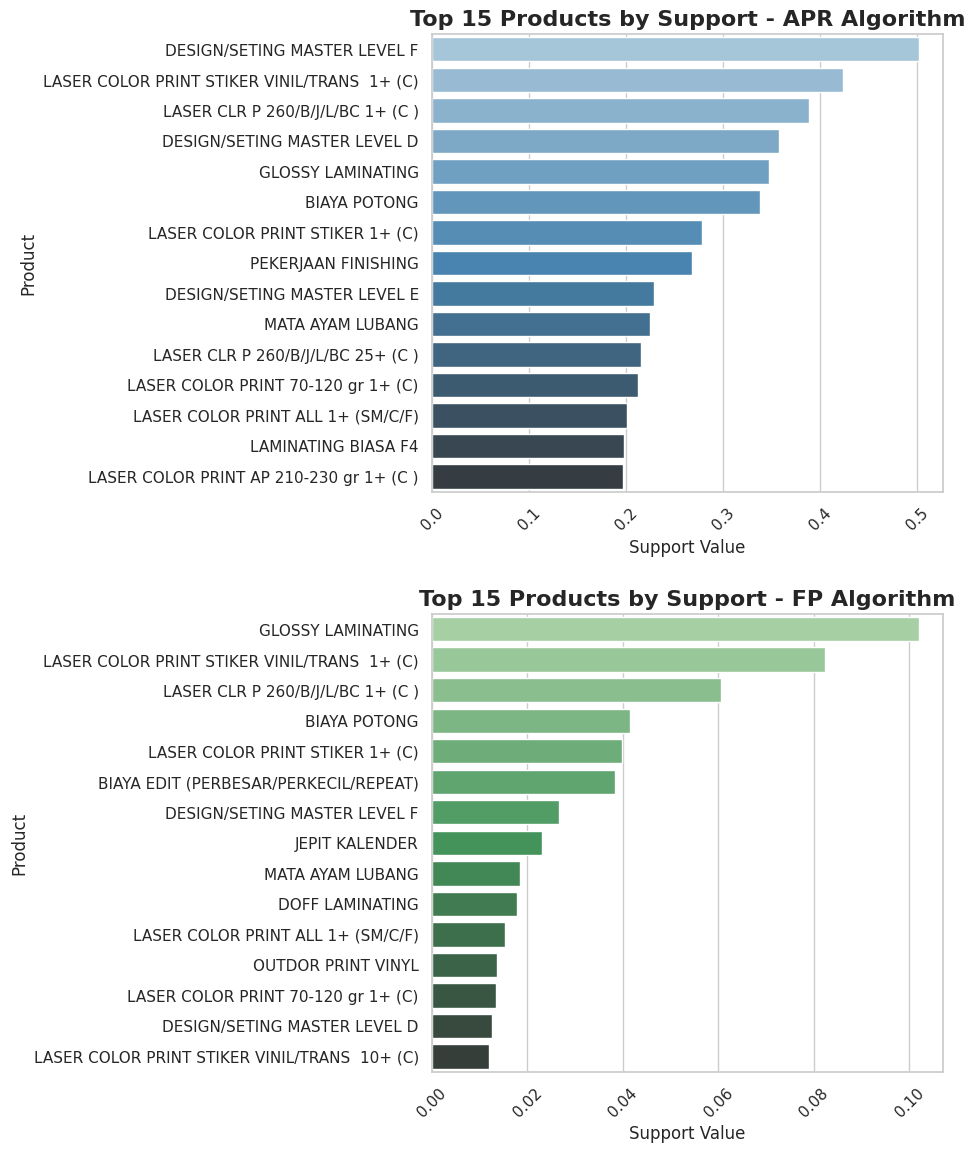

In [66]:
plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

plt.subplot(2, 1, 1)
sns.barplot(x='support', y='produk', data=top_products_apr, palette="Blues_d", dodge=False)
plt.title('Top 15 Products by Support - APR Algorithm', fontsize=16, weight='bold')
plt.xlabel('Support Value', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout(pad=2)

plt.subplot(2, 1, 2)
sns.barplot(x='support', y='produk', data=top_products_fp, palette="Greens_d", dodge=False)
plt.title('Top 15 Products by Support - FP Algorithm', fontsize=16, weight='bold')
plt.xlabel('Support Value', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout(pad=2)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

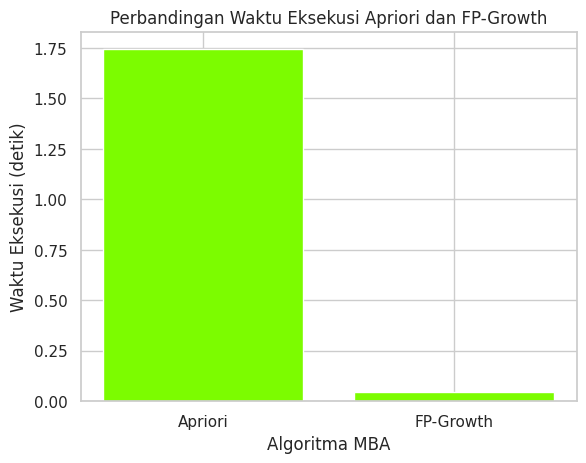

In [67]:
x = ["Apriori", "FP-Growth"]
y = [elapsed_time_apriori, elapsed_time_fpgrowth]

plt.bar(x, y, color='#7CFC00')
plt.xlabel("Algoritma MBA")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Apriori dan FP-Growth")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

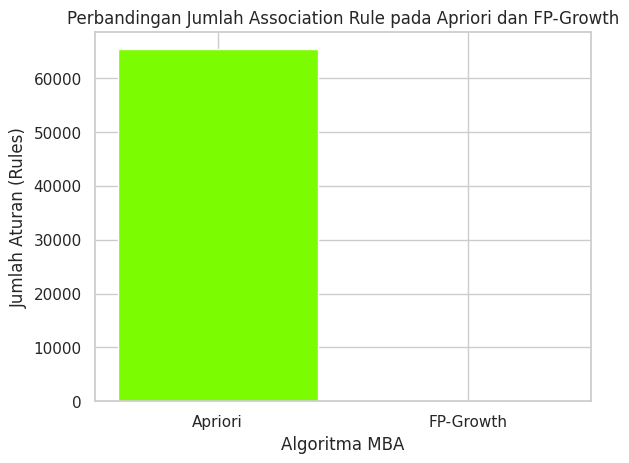

In [68]:
x = ["Apriori", "FP-Growth"]
y = [len(rule_APR), len(rule_FP)]

plt.bar(x, y, color='#7CFC00')
plt.xlabel("Algoritma MBA")
plt.ylabel("Jumlah Aturan (Rules)")
plt.title("Perbandingan Jumlah Association Rule pada Apriori dan FP-Growth")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

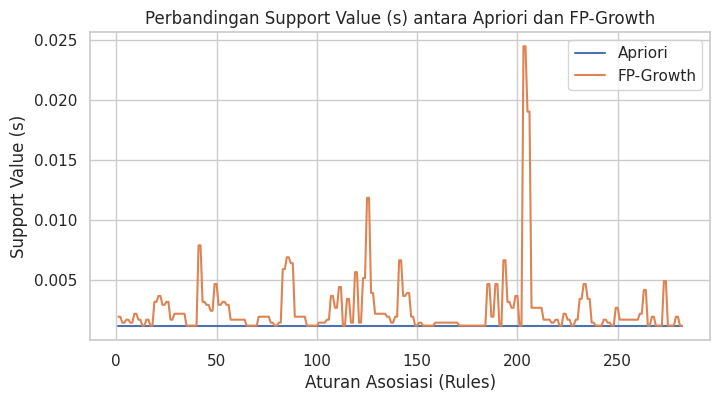

In [69]:
k = min(len(rule_APR), len(rule_FP))
x = [i for i in range(1, k+1)]

y1 = rule_APR["support"].tail(k)
y2 = rule_FP["support"].tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label="Apriori")
plt.plot(x, y2, label="FP-Growth")

plt.xlabel('Aturan Asosiasi (Rules)')
plt.ylabel('Support Value (s)')
plt.title('Perbandingan Support Value (s) antara Apriori dan FP-Growth')

plt.legend()
plt.show()

Memang rules dari algoritma FP-Growth tidak sebanyak apriori. Namun nilai support pada rules FP-Growth memiliki performa yang cukup bagus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

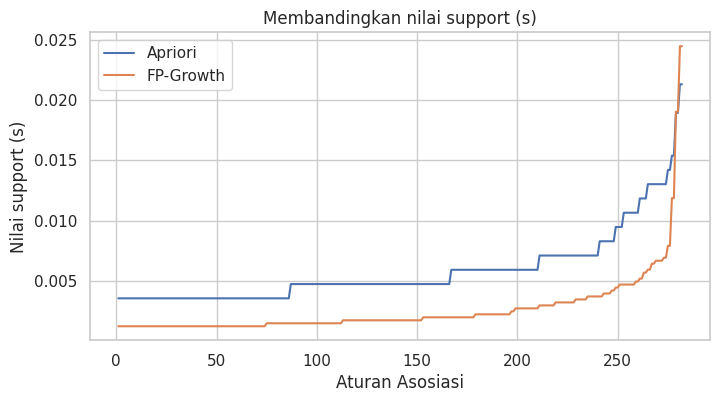

In [70]:
# Membandingkan nilai support (s) dari aturan asosiasi tiap algoritma

k   = min(len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y2  = rule_APR["support"].sort_values().tail(k)
y3  = rule_FP["support"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai support (s)')
plt.title('Membandingkan nilai support (s)')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

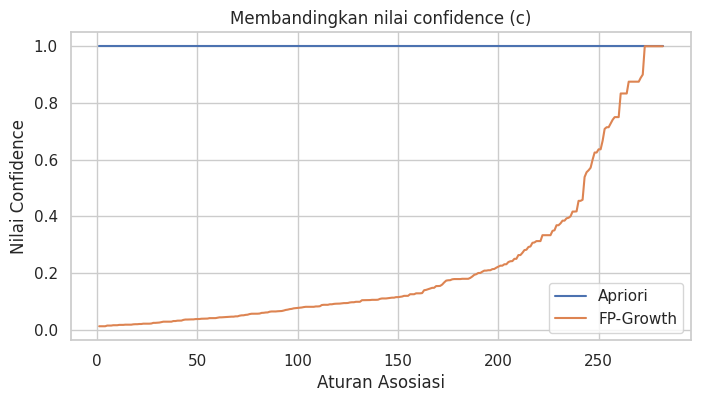

In [71]:
# Membandingkan nilai confidence (c) dari aturan asosiasi tiap algoritma

k   = min(len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y2  = rule_APR["confidence"].sort_values().tail(k)
y3  = rule_FP["confidence"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai Confidence')
plt.title('Membandingkan nilai confidence (c)')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

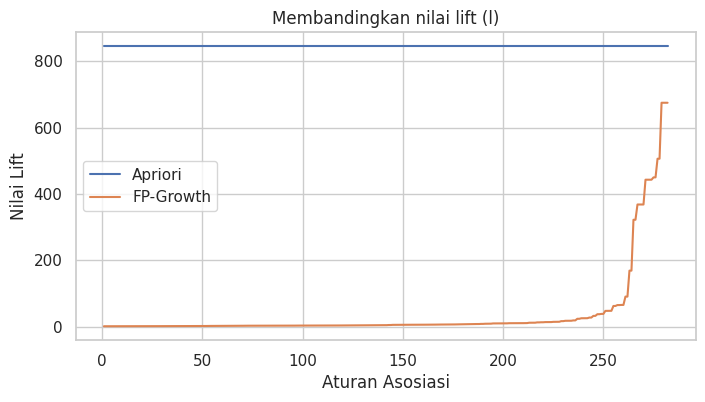

In [72]:
# Membandingkan nilai lift (l) dari aturan asosiasi tiap algoritma

k   = min(len(rule_APR), len(rule_FP)) # jml min aturan asosiasi yang ada
x   = [i for i in range(1, k+1)]                        # list

y2  = rule_APR["lift"].sort_values().tail(k)
y3  = rule_FP["lift"].sort_values().tail(k)

plt.figure(figsize=(8,4))
plt.plot(x, y2, label='Apriori')
plt.plot(x, y3, label='FP-Growth')

plt.xlabel('Aturan Asosiasi')
plt.ylabel('Nilai Lift')
plt.title('Membandingkan nilai lift (l)')

plt.legend()
plt.show()

In [73]:
# Mencari hubungan antara s, c, dan L pada suatu algoritma
custom_green_scale = [
                 [0.0, "lightgreen"],
                 [0.5, "limegreen"],
                 [1.0, "green"]
]

def banding_algoritma(rule, nama_rule):
    fig = px.scatter(rule,
                     x     = 'support',
                     y     = 'lift',
                     color = 'confidence',
                     color_continuous_scale=custom_green_scale,
                     title = f'Hubungan antara support, confidence, dan lift dalam algoritma {nama_rule}')

    fig.show()

In [74]:
banding_algoritma(rule_APR, 'Apriori')

<IPython.core.display.Javascript object>

In [75]:
banding_algoritma(rule_FP, 'FP-Growth')

<IPython.core.display.Javascript object>

In [76]:
def visualize_association_rules(rule_FP, top_n=10):
    """
    Fungsi untuk memvisualisasikan performa dari association rules menggunakan FP-Growth.
    Visualisasi ini mencakup:
      1. Histogram dari Confidence dan Lift (seperti sebelumnya)
      2. Bubble plot (Support vs Confidence, colored by Lift)
      3. Bar plot dari Top N Frequent Itemsets

    Args:
    rule_FP : pd.DataFrame
        Dataframe yang berisi aturan asosiasi dengan metrik seperti support, confidence, lift, dll.
    top_n : int
        Jumlah aturan dengan support tertinggi yang ingin ditampilkan pada bar plot (default: 10)

    Returns:
    None
    """
    # Mengatur ukuran figure untuk seluruh visualisasi
    plt.figure(figsize=(16, 12))

    # Plot 1: Histogram dari Confidence
    plt.subplot(2, 2, 1)
    sns.histplot(rule_FP['confidence'], bins=20, kde=True, color='skyblue')
    plt.title('Distribusi Confidence')
    plt.xlabel('Confidence')
    plt.ylabel('Frekuensi')

    # Plot 2: Histogram dari Lift
    plt.subplot(2, 2, 2)
    sns.histplot(rule_FP['lift'], bins=20, kde=True, color='green')
    plt.title('Distribusi Lift')
    plt.xlabel('Lift')
    plt.ylabel('Frekuensi')

    # Plot 3: Bubble plot (Support vs Confidence, colored by Lift)
    plt.subplot(2, 2, 3)
    bubble_size = rule_FP['support'] * 1000  # Scaling support for bubble size
    plt.scatter(x=rule_FP['confidence'], y=rule_FP['lift'],
                s=bubble_size, c=rule_FP['lift'], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=1)
    plt.title('Bubble Plot: Support vs Confidence (Colored by Lift)')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.colorbar(label='Lift')

    # Plot 4: Bar plot dari Top N Frequent Itemsets (Berdasarkan Support)
    plt.subplot(2, 2, 4)
    # Menggabungkan antecedents dan consequents menjadi satu string
    rule_FP['itemsets'] = rule_FP['antecedents'].apply(lambda x: ', '.join(list(x))) + ' => ' + \
                          rule_FP['consequents'].apply(lambda x: ', '.join(list(x)))

    # Memilih top N itemsets berdasarkan support
    top_itemsets = rule_FP.nlargest(top_n, 'support')[['itemsets', 'support']]

    # Plot bar
    sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='coolwarm')
    plt.title(f'Top {top_n} Frequent Itemsets Berdasarkan Support')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')

    # Menampilkan seluruh plot
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

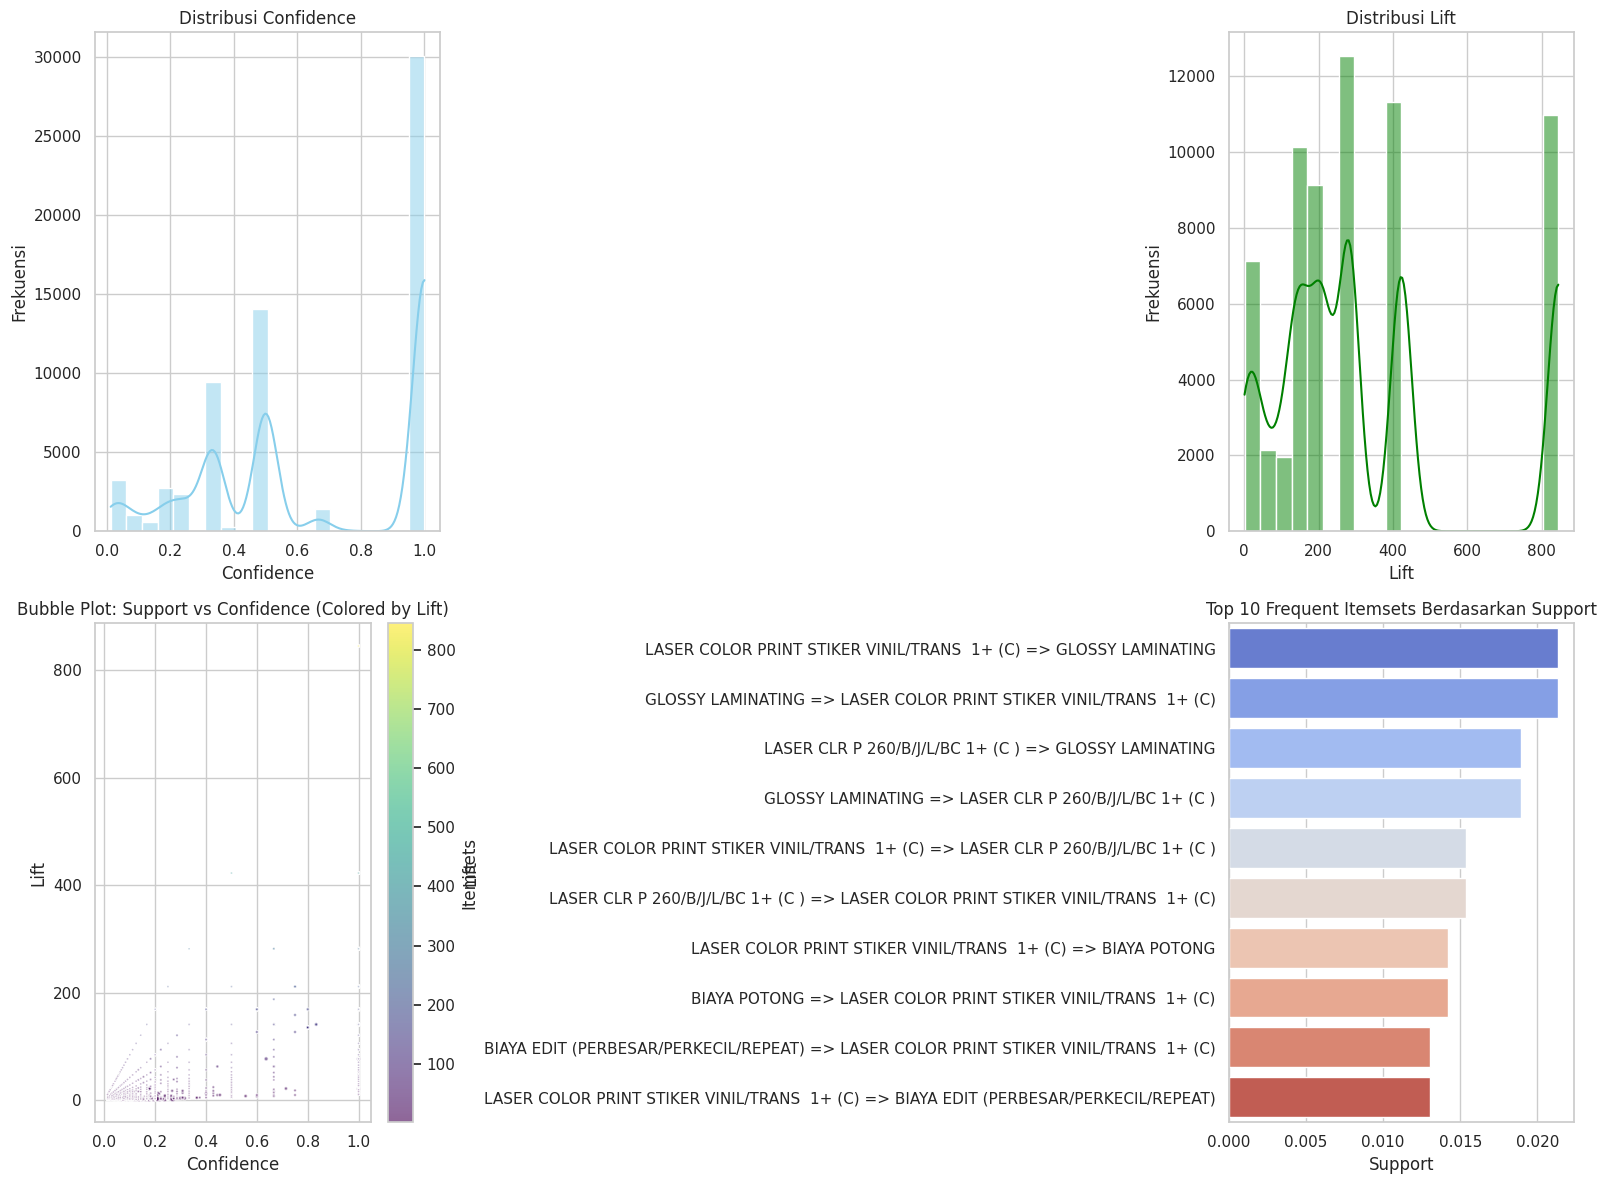

In [77]:
# Evaluasi Performa Algoritma Apriori

visualize_association_rules(rule_FP=rule_APR, top_n=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

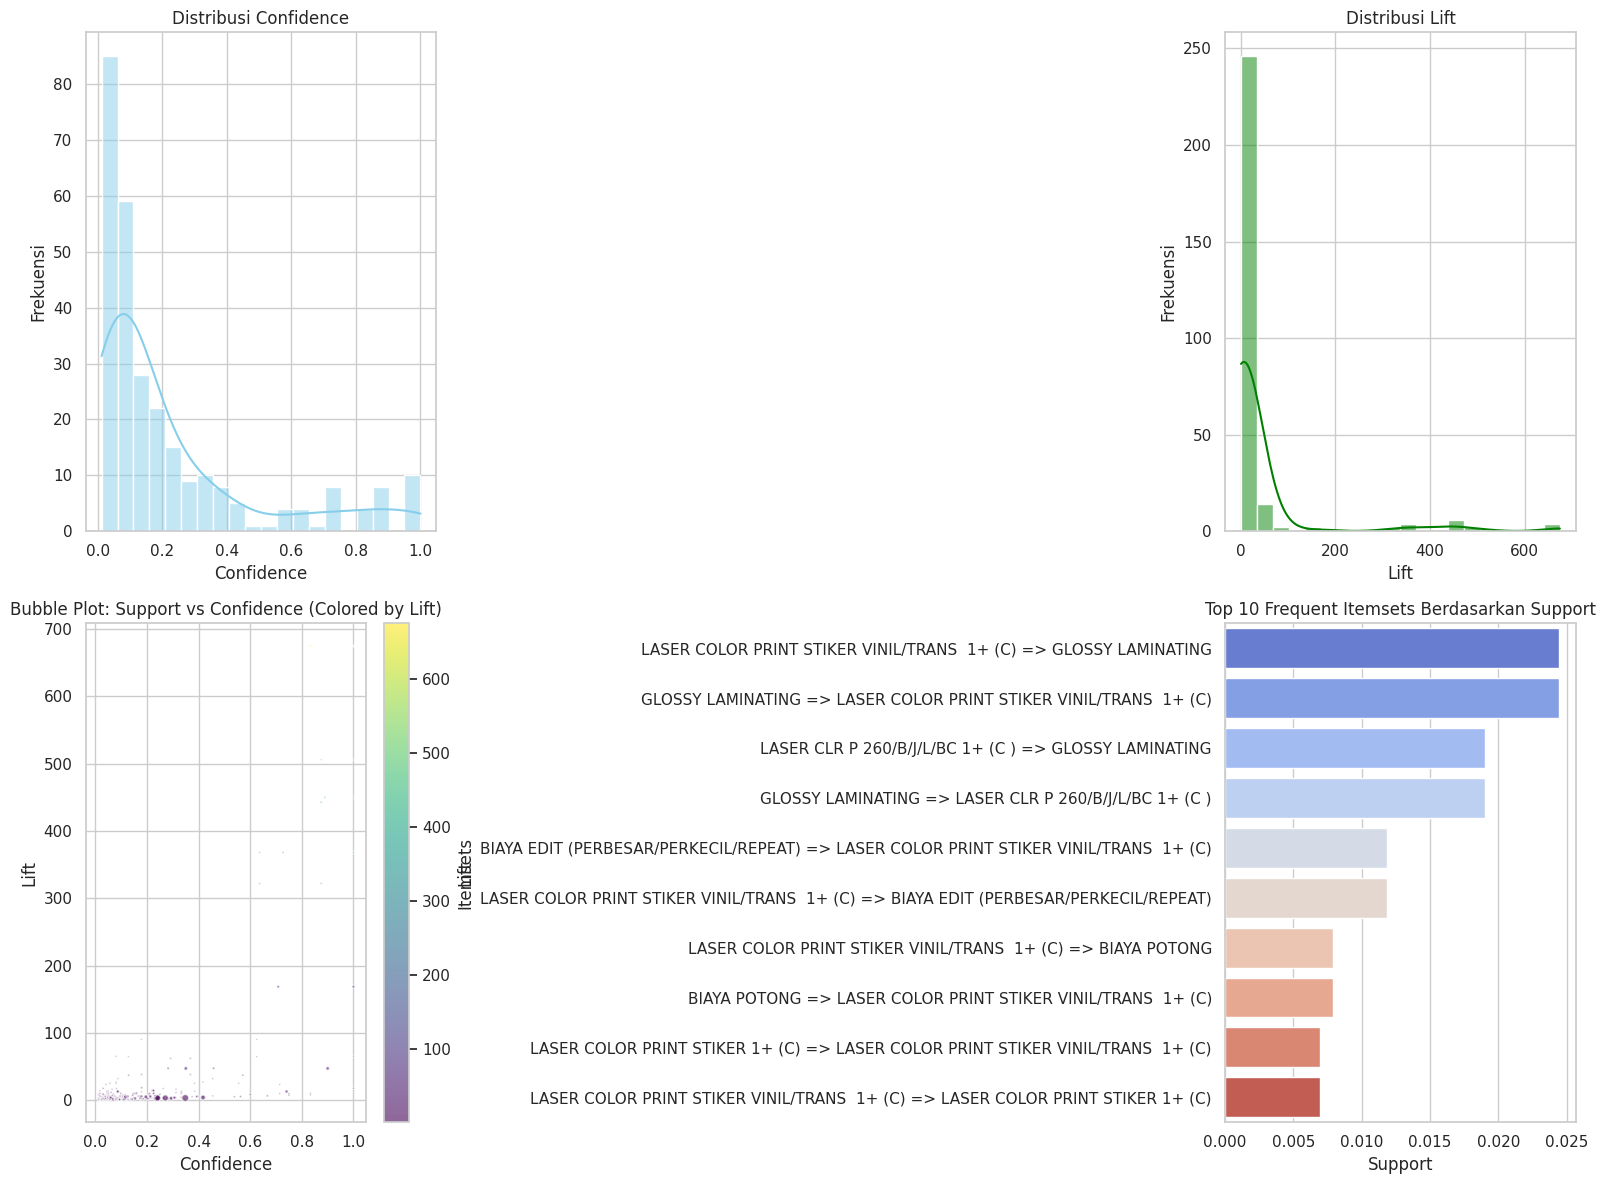

In [78]:
# Evaluasi Performa Algoritma FP-Growth

visualize_association_rules(rule_FP=rule_FP, top_n=10)

#### Evaluasi
- FP-Growth memiliki **performa waktu eksekusi yang lebih cepat** dibandingkan Apriori. Waktu eksekusi yang rendah menunjukkan efisiensi dalam menangani data transaksi.
- Apriori memiliki jumlah aturan (rule) sangat besar (60 ribu +), sehingga memiliki **kemungkinan overfitting atau kebingungan dalam memahami aturan** suatu kombinasi produk.
- Nilai **support (s)** pada FP-Growth lebih tinggi sedikit dibandingkan dengan Apriori menunjukkan bahwa frequent itemset (kombinasi produk yang sering terjadi) lebih sering muncul pada transaksi.
- Apriori menghasilkan **confidence (c)** yang tinggi menunjukkan banyak aturan yang pasti benar terjadi. Namun tidak selalu berarti aturan yang berguna, karena mengingat banyak sekali rule yang dihasilkan oleh Apriori sebelumnya.
- Apriori juga menghasilkan **lift (l)** yang tinggi menunjukkan adanya asosiasi yang sangat kuat antara itemset, namun lift yang terlalu besar bisa menandakan adanya spurious associations (asosisasi palsu). Sedangkan **FP-Growth memiliki persebaran lift dan confidence yang lebih moderat, sehingga bisa memberikan aturan yang lebih masuk akal.**


#### Hasil Evaluasi
Berdasarkan evaluasi, **algoritma FP-Growth menunjukan performa yang lebih baik dari beberapa aspek**, terutuama dari segi efisiensi waktu eksekusi dan jumlah aturan yang dihasilkan. **FP-Growth bekerja lebih cepat 16 kali lebih cepat dibandingkan algoritma Apriori**. Tingkat efisiensi yang cepat sangat dibutuhkan untuk mengatasi dataset transaksi produk pada retail dengan ukuran yang lebih besar, sehingga menghasilkan respon yang cepat untuk merekomendasikan produk.

Meskipun Apriori menghasilkan jumlah rules yang jauh lebih besar dibandingkan FP-Growth, hal ini dapat menjadi kelemahan karena aturan yang terlalu banyak bisa menyebabkan **overfitting** atau menghasilkan aturan yang kurang relevan. Sedangkan **FP-Growth menghasilkan aturan yang lebih manageable** dengan jumlah sekitar 300 aturan dan memiliki performa rekomendasi berdasarkan support (s) yang serupa dengan Aprioi.

Mengingat Apriori yang menghasilkan banyak rules, adanya nilai confidence (c) yang sangat tinggi membuat performa algoritma tersebut dipertanyakan. Nilai c yang sangat tinggi tidak selalu mencerminkan kualitas aturan yang baik, larena terlalu banyak aturan saja bisa mengarah pada asosisasi yang kurang bermakna. Sedangkan **FP-Growth memiliki persebaran confidence yang lebih wajar** yang memungkinkan interpretasi lebih realistis dari hasil rekomendasi.

Begitupun dengan nilai lift (l) yang dihasilkan Apriori sangat tinggi bisa menjadi bukti lain adanya asosiasi palsu sehingga mencerminkan kualitas asosiasi yang kurang baik.

#### Rekomendasi
Maka dari itu kami menyarankan untuk menggunakan **FP-Growth** dalam tahap produksi aplikasi rekomendasi alat tulis dan peralatan kantor. FP-Growth tidak hanya lebih cepat dan efisien, tetapi juga menghasilkan aturan yang lebih relevan dan dapat diinterpretasi dengan baik untuk memenuhi tujuan bisnis.

In [79]:
items_total_bersih = df_bersih_2021_Jan.apply(pd.Series.value_counts).sum(axis=1)
items_total_bersih = pd.DataFrame({'item': items_total_bersih.index, 'transaksi': items_total_bersih.values})

# Mendapatkan 15 produk teratas
top_15_items = items_total_bersih.sort_values('transaksi', ascending=False).head(15).reset_index(drop=True)
top_15_items.style.background_gradient(cmap='Greens')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
top_15_items

item  transaksi
0                                   PEMBELIAN ATK      778.0
1    LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)      415.0
2                LASER CLR P 260/B/J/L/BC 1+ (C )      319.0
3                               GLOSSY LAMINATING      284.0
4                 LASER COLOR PRINT STIKER 1+ (C)      250.0
5               LASER COLOR PRINT ALL 1+ (SM/C/F)      230.0
6                              OUTDOR PRINT VINYL      152.0
7                LASER COLOR PRINT STIKER 10+ (C)      140.0
8                    DESIGN/SETING MASTER LEVEL F      138.0
9   LASER COLOR PRINT STIKER VINIL/TRANS  10+ (C)      134.0
10             LASER COLOR PRINT 70-120 gr 1+ (C)      123.0
11          BIAYA EDIT (PERBESAR/PERKECIL/REPEAT)      115.0
12                                   BIAYA POTONG      109.0
13                         LASER PRINT ID CARD 1+       92.0
14                   DESIGN/SETING MASTER LEVEL E       89.0

## 1. Rekomendasi Berdasarkan Analisis Frekuensi Transaksi

In [81]:
def top_n_products(df9, df_2021_Jan, encode_tran2, n):
    items_total_bersih = df9.sum(axis=0)

    total_transaksi = df9.shape[0]
    support_values = items_total_bersih / total_transaksi

    top_items = pd.DataFrame({
        'product': encode_tran2.columns_,
        'transactions': items_total_bersih.values,
        'support': support_values.values
    })

    top_items = top_items.sort_values(by='support', ascending=False).head(n).reset_index(drop=True)

    categories = []
    for product in top_items['product']:
        category = df_2021_Jan[df_2021_Jan['produk'] == product]['kategori'].values
        if len(category) > 0:
            categories.append(category[0])
        else:
            categories.append(None)

    top_items['category'] = categories

    return top_items

In [82]:
top_10_products = top_n_products(df9, df_2021_Jan, encode_tran2, 10)
top_10_products.style.background_gradient(cmap='Blues')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

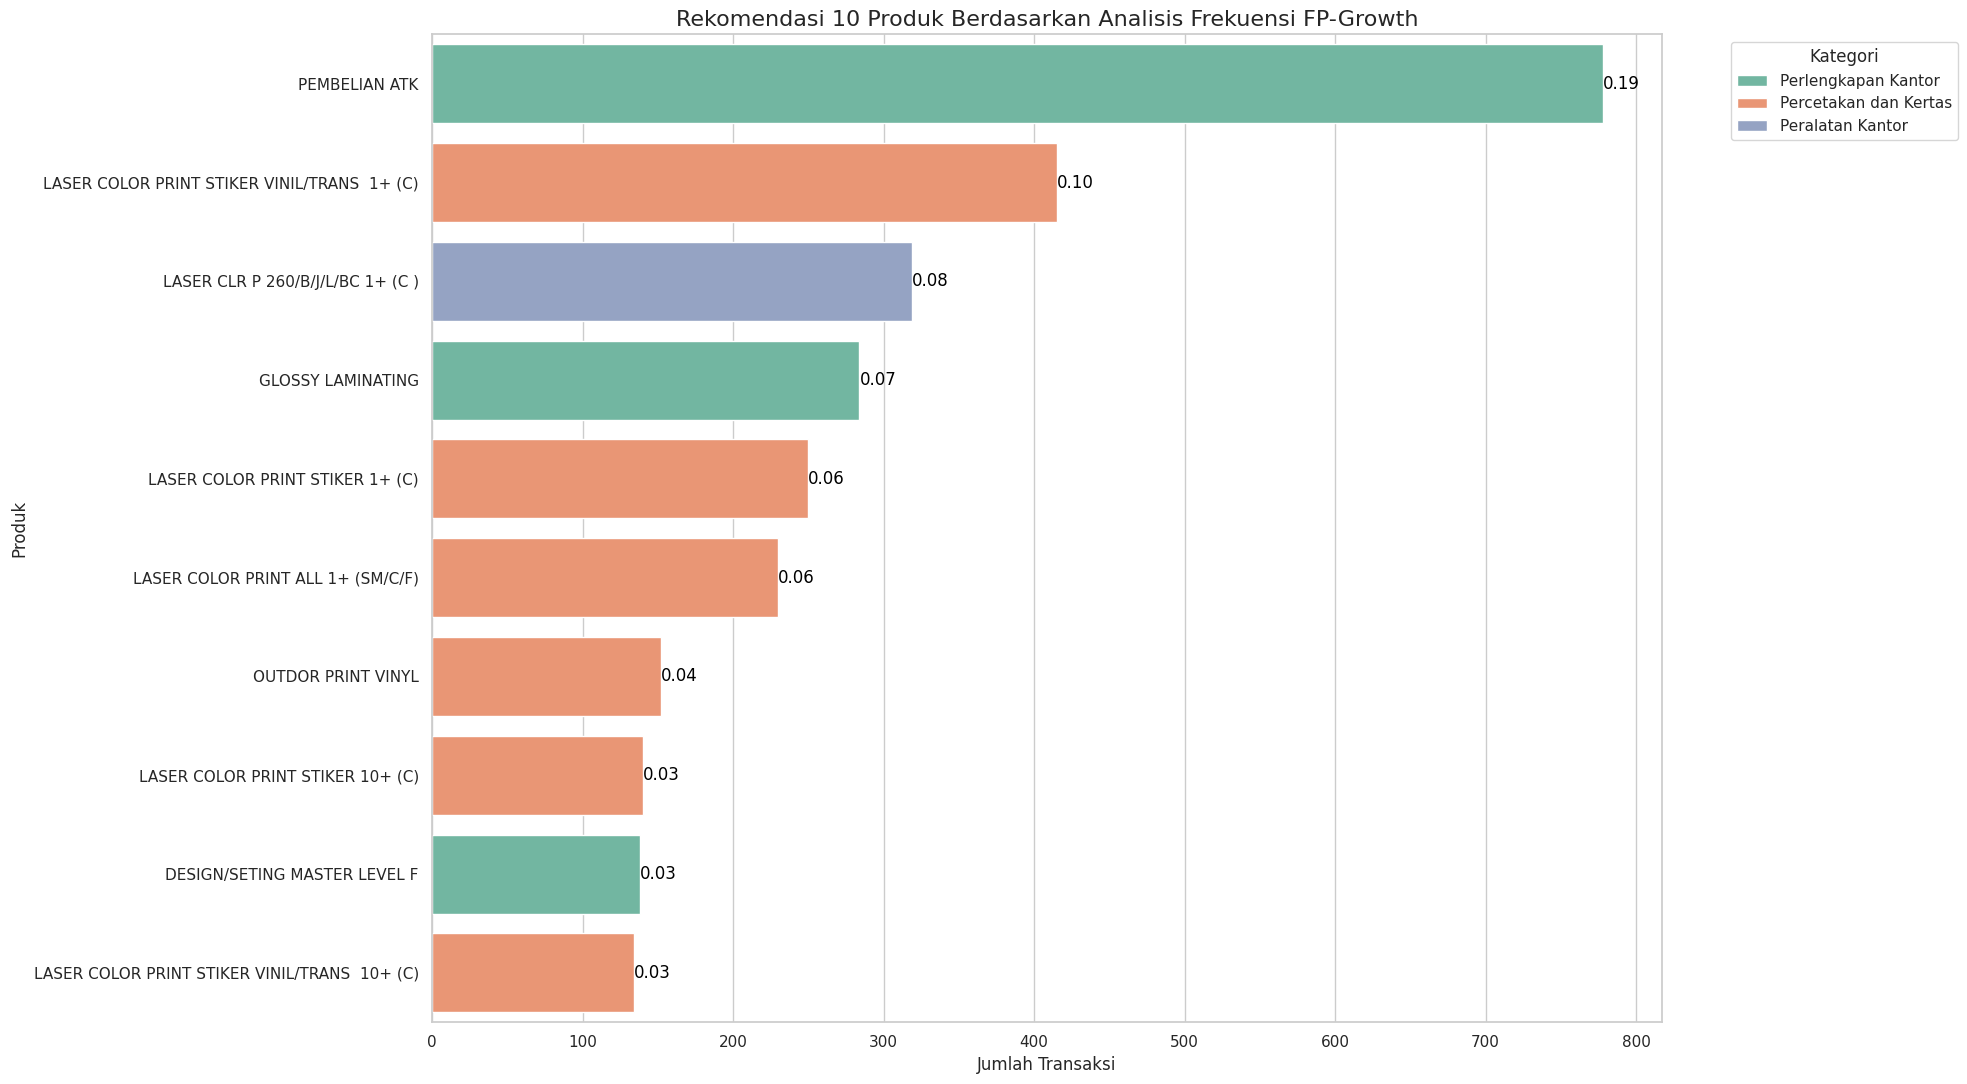

In [83]:
plt.figure(figsize=(20, 11))
bar_plot = sns.barplot(x='transactions', y='product', data=top_10_products, hue='category', dodge=False, palette='Set2')

plt.title('Rekomendasi 10 Produk Berdasarkan Analisis Frekuensi FP-Growth', fontsize=16)
plt.xlabel('Jumlah Transaksi', fontsize=12)
plt.ylabel('Produk', fontsize=12)

for index, row in top_10_products.iterrows():
    bar_plot.text(row['transactions'], index, f"{row['support']:.2f}", color='black', ha="left", va="center")

plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [84]:
def top_n_recommendations(df9, df_2021_Jan, encode_tran2, rule_FP, n):
    items_total_bersih = df9.sum(axis=0)
    total_transaksi = df9.shape[0]
    support_values = items_total_bersih / total_transaksi

    top_items = pd.DataFrame({
        'product': encode_tran2.columns_,
        'transactions': items_total_bersih.values,
        'support': support_values.values
    })

    top_items = top_items.sort_values(by='support', ascending=False).head(n).reset_index(drop=True)

    categories = []
    for product in top_items['product']:
        category = df_2021_Jan[df_2021_Jan['produk'] == product]['kategori'].values
        if len(category) > 0:
            categories.append(category[0])
        else:
            categories.append(None)

    top_items['category'] = categories

    recommendations = []
    for antecedent in top_items['product']:
        rule_subset = rule_FP[rule_FP['antecedents'].apply(lambda x: antecedent in x)]

        for _, rule in rule_subset.iterrows():
            recommendations.append({
                'product': next(iter(rule['consequents'])),
                'support': rule['support'],
            })

    recommendations_df = pd.DataFrame(recommendations)

    recommendations_df = recommendations_df.groupby('product').agg({
        'support': 'max',
    }).reset_index()

    recommendations_df['category'] = recommendations_df['product'].apply(lambda x: df_2021_Jan[df_2021_Jan['produk'] == x]['kategori'].values[0] if len(df_2021_Jan[df_2021_Jan['produk'] == x]['kategori'].values) > 0 else None)

    recommendations_df = recommendations_df.sort_values(by='support', ascending=False).reset_index(drop=True)

    recommendations_df = recommendations_df.head(n)

    return recommendations_df

In [85]:
top_n_recommendations_df = top_n_recommendations(df9, df_2021_Jan, encode_tran2, rule_FP, 10)

top_n_recommendations_df.style.background_gradient(cmap='Blues')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

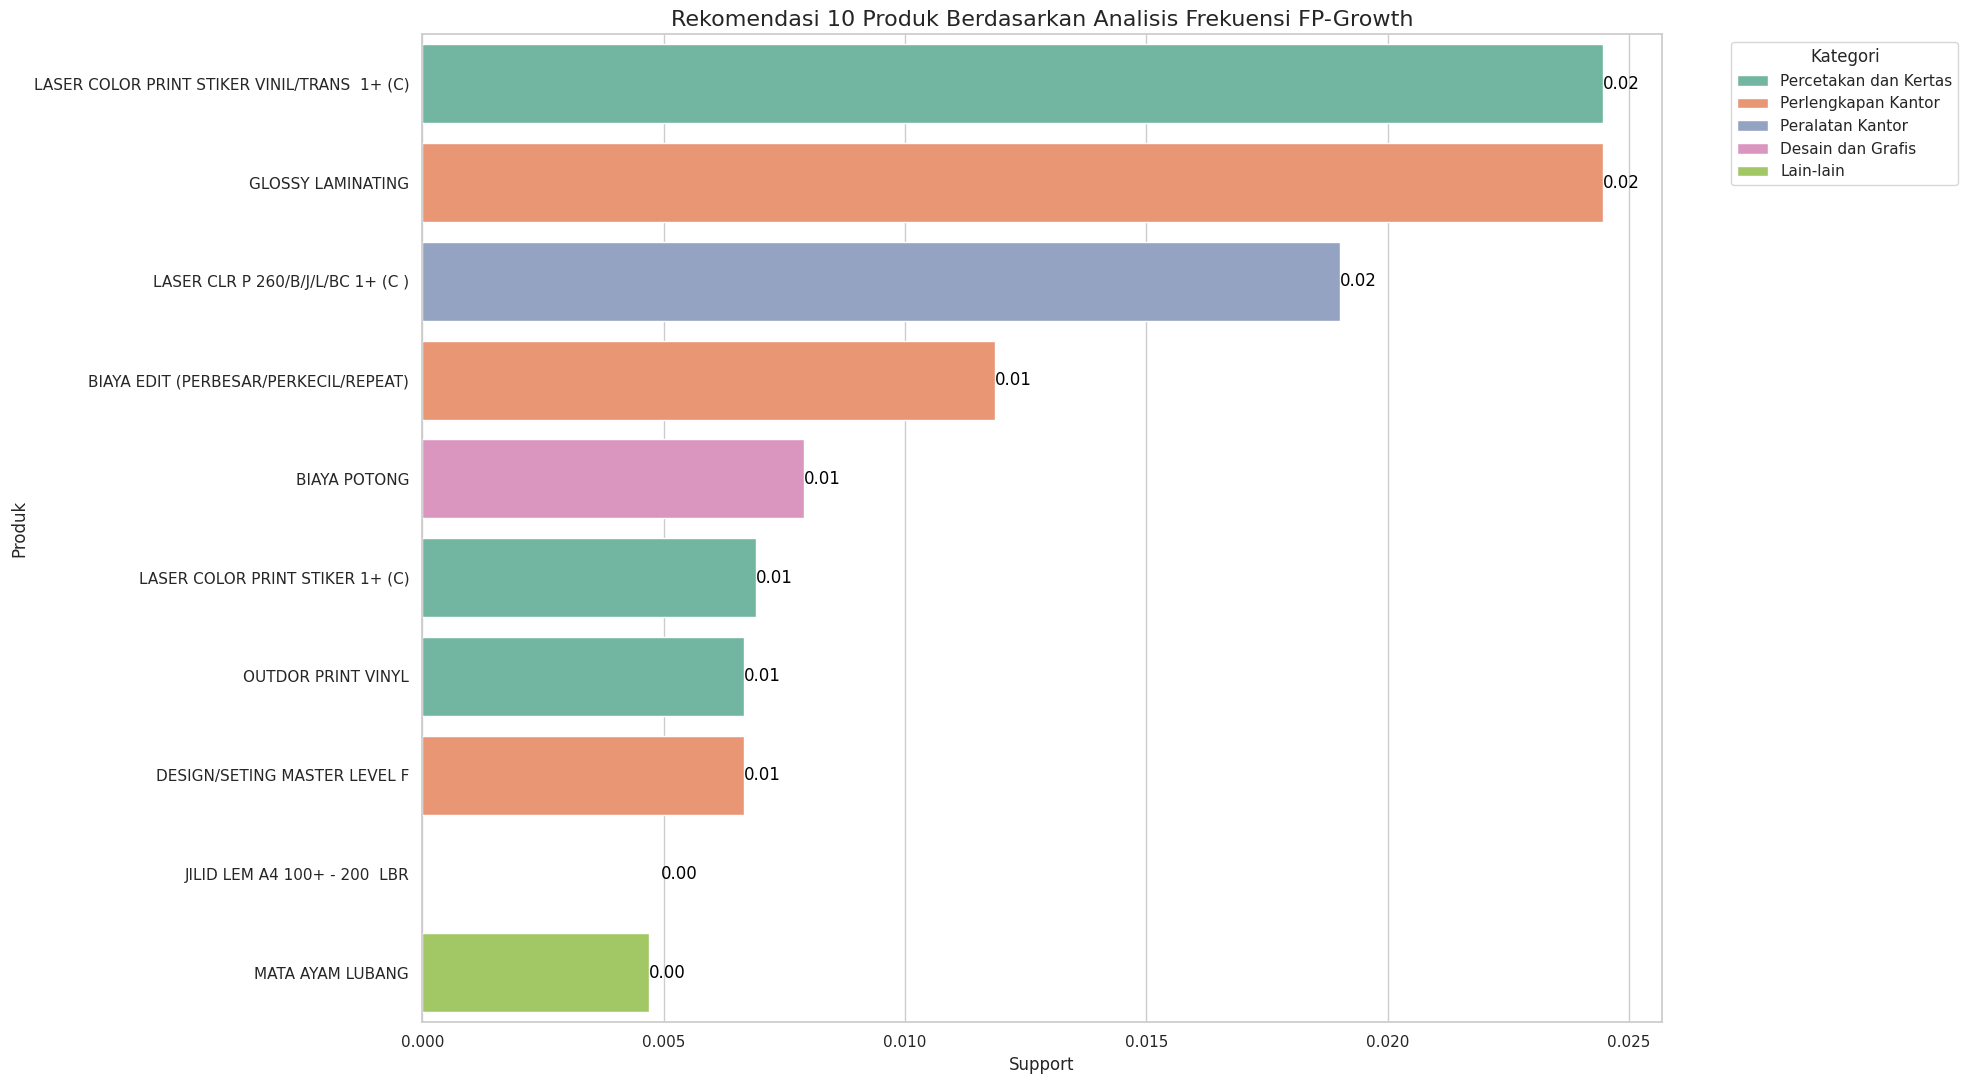

In [86]:
plt.figure(figsize=(20, 11))

bar_plot = sns.barplot(x='support', y='product', data=top_n_recommendations_df, hue='category', dodge=False, palette='Set2')

plt.title('Rekomendasi 10 Produk Berdasarkan Analisis Frekuensi FP-Growth', fontsize=16)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Produk', fontsize=12)

for index, row in top_n_recommendations_df.iterrows():
    bar_plot.text(row['support'], index, f"{row['support']:.2f}", color='black', ha="left", va="center")

plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 2. Rekomendasi Produk Berdasarkan Budget Pengguna

In [87]:
def top_n_products_by_revenue(rule_FP, df_2021_Jan, encode_tran2, input_omset, n):
    rule_FP_sorted = rule_FP.sort_values(by='support', ascending=False)

    min_omset = input_omset * 0.65
    max_omset = input_omset * 1.35

    df_filtered = df_2021_Jan[(df_2021_Jan['omset'] >= min_omset) & (df_2021_Jan['omset'] <= max_omset)]

    top_products_support = []
    for idx, row in rule_FP_sorted.iterrows():
        product_name = row['antecedents']
        product_name = list(product_name)[0]

        if product_name in df_filtered['produk'].values:
            product_info = df_filtered[df_filtered['produk'] == product_name].iloc[0]
            omset = product_info['omset']
            kategori = product_info['kategori']
            jumlah_transaksi = df_filtered[df_filtered['produk'] == product_name]['quantity'].sum()

            top_products_support.append({
                'product': product_name,
                'support': row['support'],
                'omset': omset,
                'category': kategori,
                'transactions': jumlah_transaksi
            })

        if len(top_products_support) >= n:
            break

    df_top_products = pd.DataFrame(top_products_support)

    return df_top_products.reset_index(drop=True)


In [88]:
input_omset = 45000
n = 10

df_top_products = top_n_products_by_revenue(rule_FP,
                                            df_2021_Jan,
                                            encode_tran2,
                                            input_omset,
                                            n)

<IPython.core.display.Javascript object>

In [89]:
df_top_products

product   support    omset  \
0  LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.024457  40000.0   
1              LASER CLR P 260/B/J/L/BC 1+ (C )  0.019022  42000.0   
2  LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.011858  40000.0   
3                                  BIAYA POTONG  0.007905  37500.0   
4  LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.007905  40000.0   
5  LASER COLOR PRINT STIKER VINIL/TRANS  1+ (C)  0.006917  40000.0   
6               LASER COLOR PRINT STIKER 1+ (C)  0.006917  45000.0   
7                        JASA NOMOR NCR TOKORIO  0.006670  40000.0   
8                            OUTDOR PRINT VINYL  0.006670  60000.0   
9               LASER COLOR PRINT STIKER 1+ (C)  0.006423  45000.0   

                category  transactions  
0  Percetakan dan Kertas         360.0  
1       Peralatan Kantor         190.0  
2  Percetakan dan Kertas         360.0  
3      Desain dan Grafis           5.0  
4  Percetakan dan Kertas         360.0  
5  Percetakan dan Kertas         360.0  
6  Percetakan dan Kertas         320.0  
7    Perlengkapan Kantor         800.0  
8  Percetakan dan Kertas          58.0  
9  Percetakan dan Kertas         320.0

In [90]:
import squarify

df_top_products_sorted = df_top_products.sort_values(by='support', ascending=False)

plt.figure(figsize=(12, 8))

category_colors = ['#B2E8B0', '#99DBAE', '#78CFA4', '#4FC59A', '#26B88F']
category_color_map = {category: category_colors[i % len(category_colors)] for i, category in enumerate(df_top_products_sorted['category'].unique())}


df_top_products_sorted['color'] = df_top_products_sorted['support'].apply(lambda x: plt.cm.summer(x / df_top_products_sorted['support'].max()))  # Use the summer colormap


squarify.plot(sizes=df_top_products_sorted['support'],
              label=df_top_products_sorted['product'] + '\n' +
                    'Support: ' + df_top_products_sorted['support'].round(2).astype(str) + '\n' +
                    'Omset: ' + df_top_products_sorted['omset'].astype(str) + '\n' +
                    'Transaksi: ' + df_top_products_sorted['transactions'].astype(str),
              color=df_top_products_sorted['color'],
              alpha=0.8)


for i in range(len(df_top_products_sorted)):
    plt.text(x=0.5, y=0.5, s=str(df_top_products_sorted['support'].iloc[i]),
             ha='center', va='center', color='black', weight='bold', fontsize=10)


plt.title('Visualisasi Rekomendasi Produk Sekitar Rp 45.000,00', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Top 3 Rules Paling Populer

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

def get_top_n_rules(rule_FP, n):
    return rule_FP.sort_values(by='support', ascending=False).head(n)

# Fungsi untuk memvisualisasikan top n rules dalam bentuk graf
def visualize_rules_graph(rule_FP, n):
    top_n_rules = get_top_n_rules(rule_FP, n)

    # Membuat graph
    G = nx.DiGraph()

    # Menambahkan edges ke graph
    for _, row in top_n_rules.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        support = row['support']

        for antecedent in antecedents:
            G.add_edge(antecedent, consequents[0], weight=support)

    # Menentukan posisi node
    pos = nx.spring_layout(G)

    # Menggambar graph
    plt.figure(figsize=(12, 8))
    edges = G.edges(data=True)

    # Mengatur ketebalan edge berdasarkan bobot (support)
    weights = [edge[2]['weight'] * 20 for edge in edges]  # Meningkatkan pengali menjadi 20
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7)  # Mengubah alpha menjadi 0.7 untuk lebih terlihat
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title('Top n Association Rules Graph', fontsize=16)
    plt.axis('off')  # Mematikan sumbu
    plt.show()

# Mengatur jumlah aturan yang ingin divisualisasikan
n = 10
visualize_rules_graph(rule_FP, n)


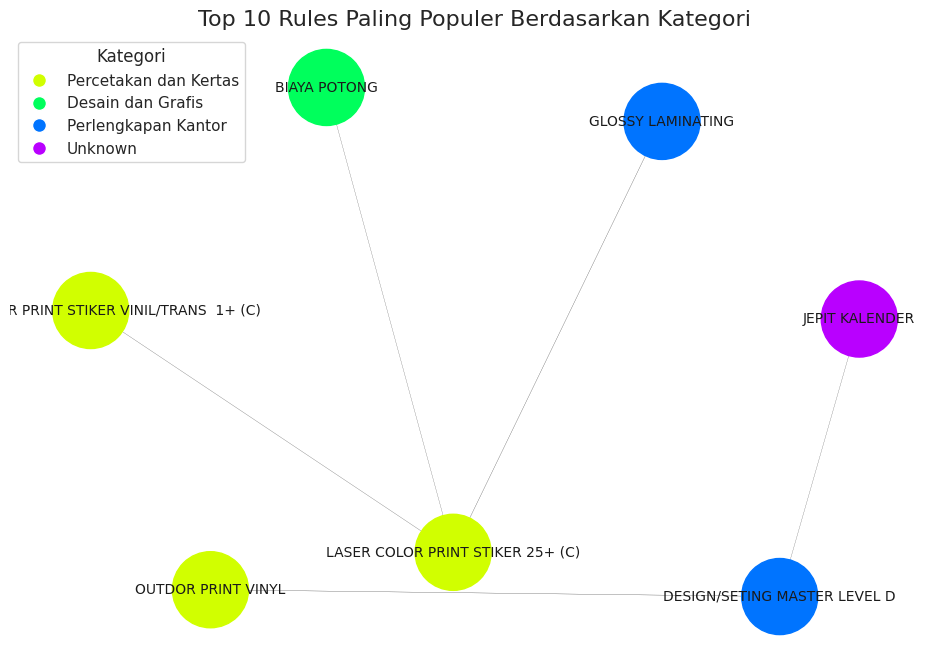

In [100]:
def get_product_categories(rule_FP, df_2021_Jan):
    product_categories = {}

    for idx, row in rule_FP.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])

        products = antecedents + consequents

        for product in products:
            if product in df_2021_Jan['produk'].values:
                kategori = df_2021_Jan[df_2021_Jan['produk'] == product]['kategori'].values[0]
                product_categories[product] = kategori
            else:
                product_categories[product] = 'Unknown'

    return product_categories

def visualize_rules_graph(rule_FP, df_2021_Jan, n):
    top_n_rules = rule_FP.head(n)

    product_categories = get_product_categories(top_n_rules, df_2021_Jan)

    G = nx.DiGraph()

    for _, row in top_n_rules.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        support = row['support']

        for antecedent in antecedents:
            G.add_edge(antecedent, consequents[0], weight=support)

    pos = nx.spring_layout(G)

    unique_categories = list(set(product_categories.values()))
    color_palette = sns.color_palette('hsv', len(unique_categories))
    color_map = {category: color_palette[i] for i, category in enumerate(unique_categories)}

    node_colors = [color_map.get(product_categories.get(node, 'Unknown'), (0.5, 0.5, 0.5)) for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    edges = G.edges(data=True)

    weights = [edge[2]['weight'] * 90 for edge in edges]

    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, cmap=plt.get_cmap('hsv'))
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    legend_labels = {category: plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
                     for category, color in color_map.items()}
    plt.legend(legend_labels.values(), legend_labels.keys(), title="Kategori", loc='upper left')

    plt.title('Top 10 Rules Paling Populer Berdasarkan Kategori', fontsize=16)
    plt.axis('off')
    plt.show()

n = 10
visualize_rules_graph(rule_FP, df_2021_Jan, n)


Berdasarkan top 10 rekomendasi produk tersebut beserta hubungannya. Kami merekomendasikan untuk produk yang dijual dengan kategori Percetakan dan Kertas itu jaraknya dekat dengan produk dengan kategori Perlengkapan Kantor.